# Виконав студент ІП-21 Пізнак Роман

# Завдання
1) Побудувати та проаналізувати часовий ряд для статистики захворювань на Covid в двох сусідніх країнах по вашому вибору (дані взяти в інтернеті).
2) Побудувати та проаналізувати часовий ряд для курсу гривня/долар або гривня/євро за останні 3 роки (дані взяти в інтернеті). 

# Виконання

# 1) Побудувати та проаналізувати часовий ряд для статистики захворювань на Covid в двох сусідніх країнах по вашому вибору (дані взяти в інтернеті).

Завантажимо необхідні для роботи бібліотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

На платформі <b>Kaggle</b> знайдемо датасет з відомостями про статистику захворювань на Covid у різних країнах світу упродовж деякого терміну - https://www.kaggle.com/datasets/georgesaavedra/covid19-dataset . Завантажимо дані у датафрейм.

In [2]:
df = pd.read_csv('covid_data.csv')

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    166326 non-null  object 
 1   continent                                   156370 non-null  object 
 2   location                                    166326 non-null  object 
 3   date                                        166326 non-null  object 
 4   total_cases                                 163293 non-null  float64
 5   new_cases                                   163133 non-null  float64
 6   new_cases_smoothed                          161150 non-null  float64
 7   total_deaths                                145451 non-null  float64
 8   new_deaths                                  145487 non-null  float64
 9   new_deaths_smoothed                         143390 non-null  float64
 

Виділимо необхідні нам стовпці

In [5]:
df = df.loc[:, ['location', 'date', 'new_cases']]

In [6]:
df.head()

,location,date,new_cases
0,Afghanistan,2020-02-24,5.0
1,Afghanistan,2020-02-25,0.0
2,Afghanistan,2020-02-26,0.0
3,Afghanistan,2020-02-27,0.0
4,Afghanistan,2020-02-28,0.0


У даній лабораторній роботі порівнюватимемо статистику захворювань для двох приблизно рівних за населенням, економічним розвитком та географічним рощташуванням країн: <b>Великої Британії</b> та <b>Франції</b>. Переглянемо дані, що стосуються цих країн та усунемо лишні дані у датафреймі

In [7]:
df[df['location'] == 'United Kingdom']

,location,date,new_cases
156457,United Kingdom,2020-01-31,2.0
156458,United Kingdom,2020-02-01,0.0
156459,United Kingdom,2020-02-02,0.0
156460,United Kingdom,2020-02-03,6.0
156461,United Kingdom,2020-02-04,0.0
...,...,...,...
157217,United Kingdom,2022-03-01,99485.0
157218,United Kingdom,2022-03-02,45036.0
157219,United Kingdom,2022-03-03,45683.0
157220,United Kingdom,2022-03-04,44806.0


In [8]:
df[df['location'] == 'France']

,location,date,new_cases
53839,France,2020-01-24,2.0
53840,France,2020-01-25,1.0
53841,France,2020-01-26,0.0
53842,France,2020-01-27,0.0
53843,France,2020-01-28,1.0
...,...,...,...
54606,France,2022-03-01,79794.0
54607,France,2022-03-02,57697.0
54608,France,2022-03-03,60282.0
54609,France,2022-03-04,57789.0


Переформатовуємо вигляд таблиці

In [9]:
df = df.pivot_table(index='date', columns='location', values='new_cases')
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')
df = df.interpolate(method='linear')
df.head()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,100.0,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,287.0,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,493.0,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,683.0,NaN,NaN,NaN


In [10]:
neighbors_df = df[['France', 'United Kingdom']].copy()

In [11]:
neighbors_df.head()

location,France,United Kingdom
date,,
2020-01-22,NaN,NaN
2020-01-23,NaN,NaN
2020-01-24,2.0,NaN
2020-01-25,1.0,NaN
2020-01-26,0.0,NaN


In [12]:
neighbors_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 774 entries, 2020-01-22 to 2022-03-05
Freq: D
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   France          772 non-null    float64
 1   United Kingdom  765 non-null    float64
dtypes: float64(2)
memory usage: 18.1 KB


<b> Попередня обробка даних - ✔ </b>

Перейдемо до аналізу. Візуалізуємо динаміку захворювань на COVID у Франції та Британії

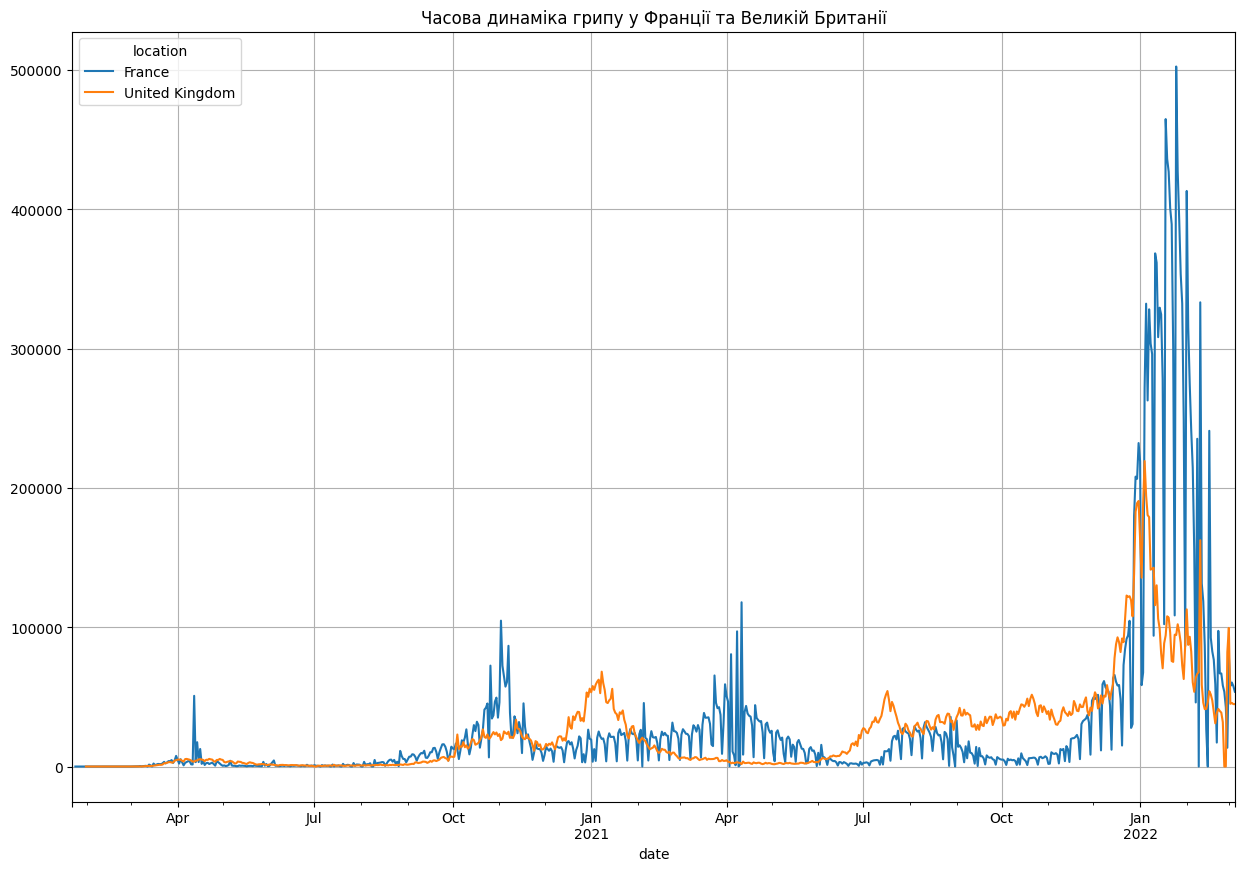

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))

neighbors_df[['France', 'United Kingdom']].plot(ax=ax)
plt.title('Часова динаміка грипу у Франції та Великій Британії')
ax.grid()
plt.show()

<b>1.1. Досліджуємо часовий ряд захворювання на COVID у Франції</b>

In [14]:
france_df = neighbors_df['France']

In [15]:
france_df.head()

date
2020-01-22    NaN
2020-01-23    NaN
2020-01-24    2.0
2020-01-25    1.0
2020-01-26    0.0
Freq: D, Name: France, dtype: float64

In [16]:
france_df.describe()

count       772.000000
mean      30551.544041
std       69936.727842
min           0.000000
25%        1959.750000
50%        9388.500000
75%       24592.000000
max      502507.000000
Name: France, dtype: float64

In [17]:
france_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 774 entries, 2020-01-22 to 2022-03-05
Freq: D
Series name: France
Non-Null Count  Dtype  
--------------  -----  
772 non-null    float64
dtypes: float64(1)
memory usage: 12.1 KB


Візуалізуємо з допомогою гістограми

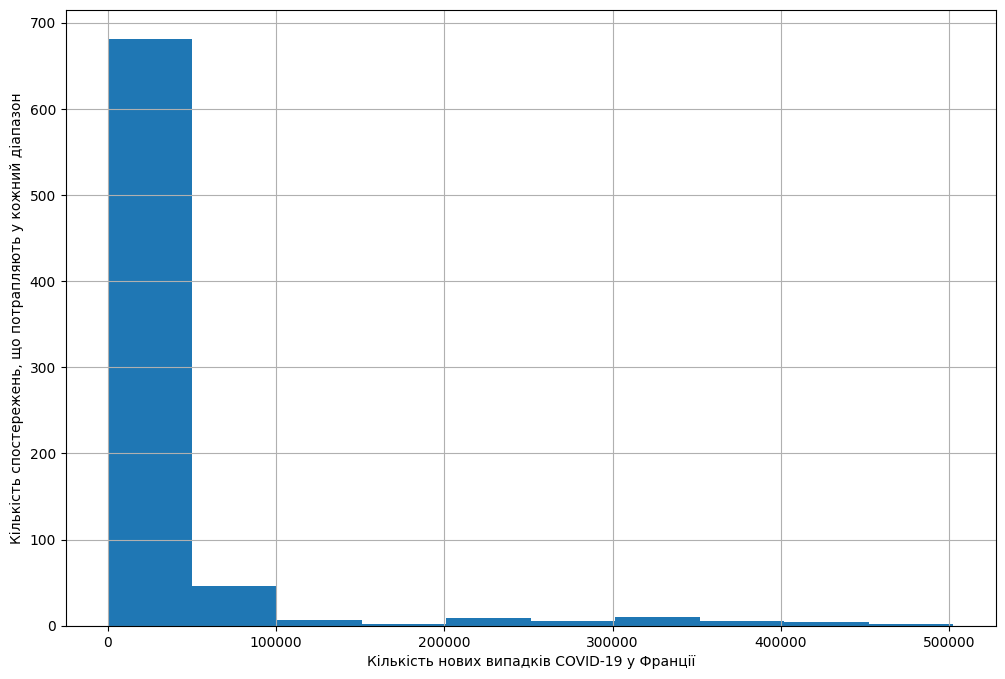

In [18]:
france_df.hist(figsize=(12,8))

plt.xlabel('Кількість нових випадків COVID-19 у Франції')
plt.ylabel('Кількість спостережень, що потрапляють у кожний діапазон')

plt.show()

Застосуємо згладжування за допомогою ковзаючого середнього

In [19]:
def plot_moving_average(series, n):
    rolling_mean = series.rolling(window=n).mean()
    plt.figure(figsize=(15, 10))
    plt.title(f'Moving average\n window size = {n}')
    plt.plot(rolling_mean, c='orange', label='Rolling mean trend')
    plt.plot(series[n:], label='Actual values')
    plt.legend(loc='upper left')
    plt.grid(True)

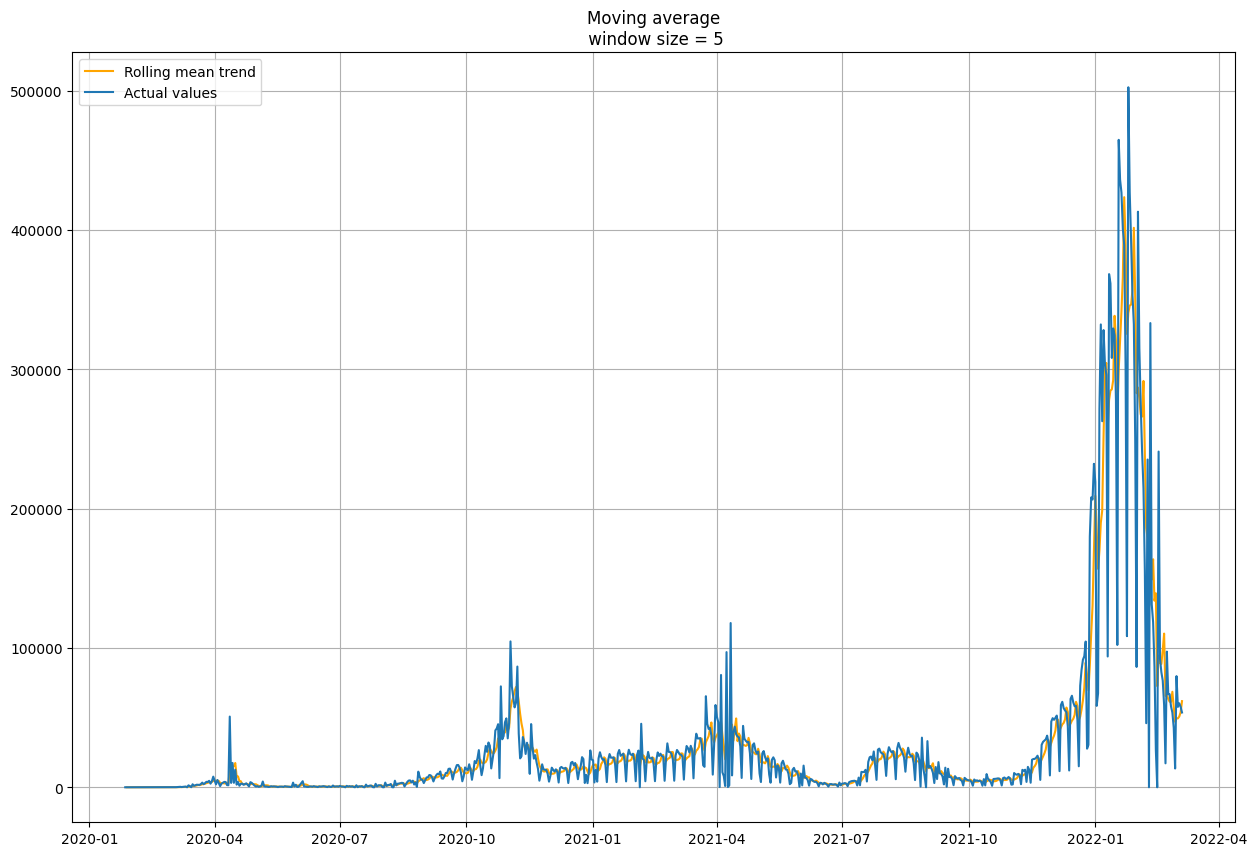

In [20]:
plot_moving_average(france_df, 5)

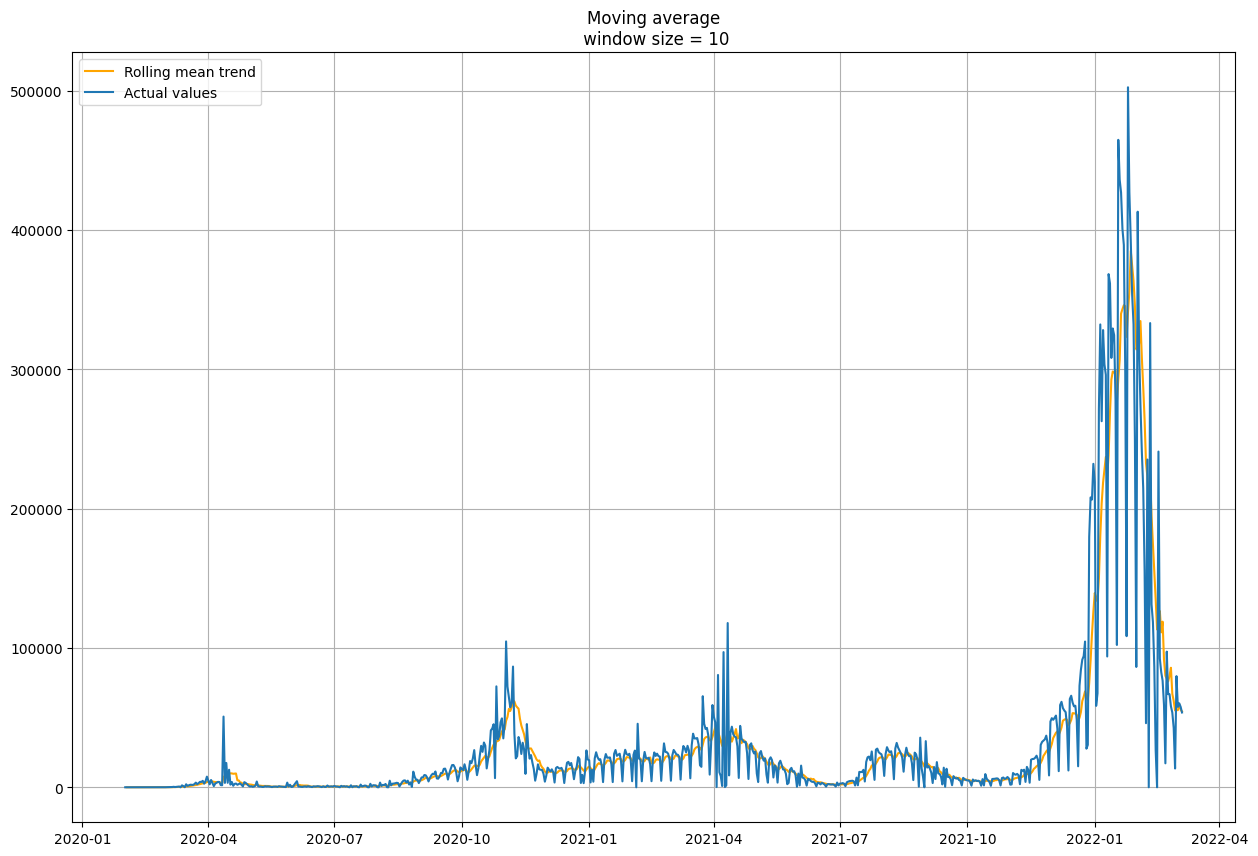

In [21]:
plot_moving_average(france_df, 10)

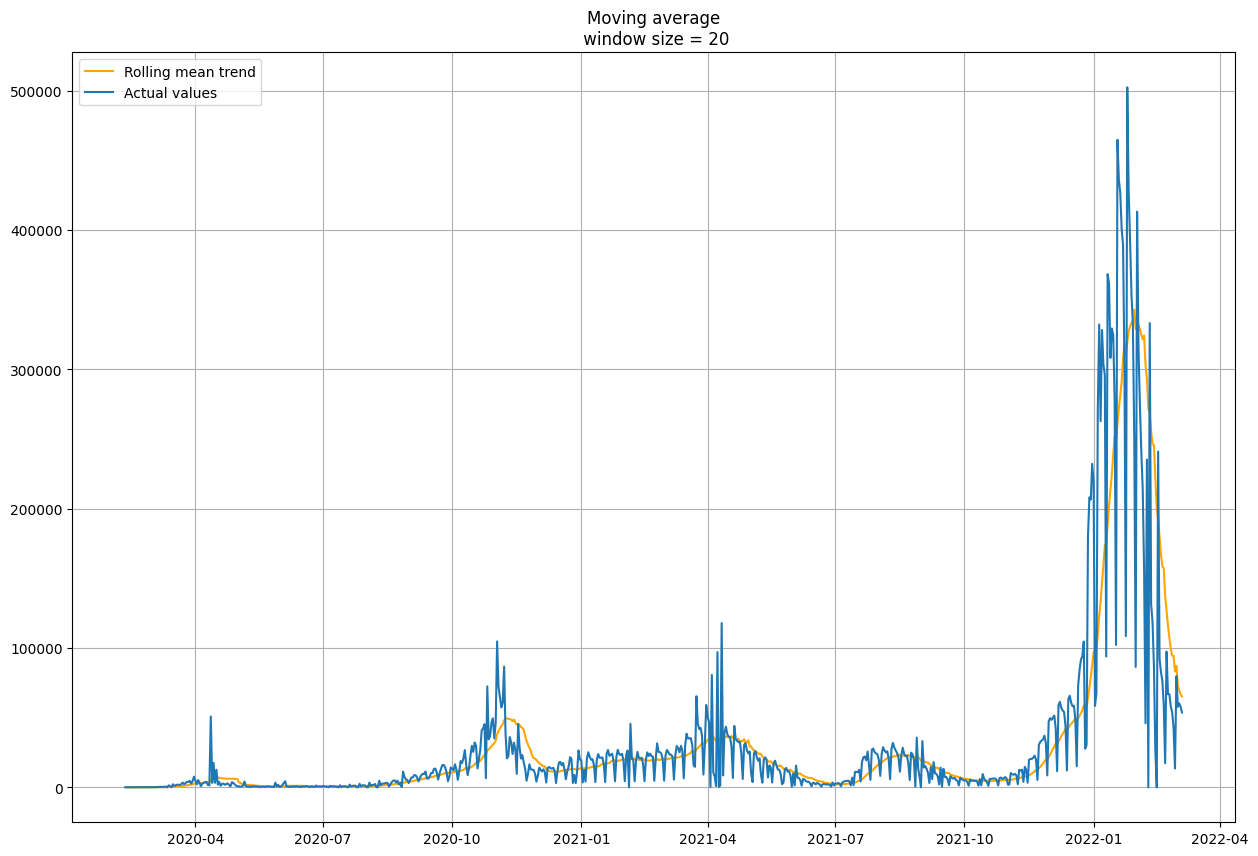

In [22]:
plot_moving_average(france_df, 20)

<b>Візуалізуємо декомпозицію ряду на тренд, сезонність та залишки</b>

In [23]:
decomposition = smt.seasonal_decompose(france_df[~france_df.isna()])

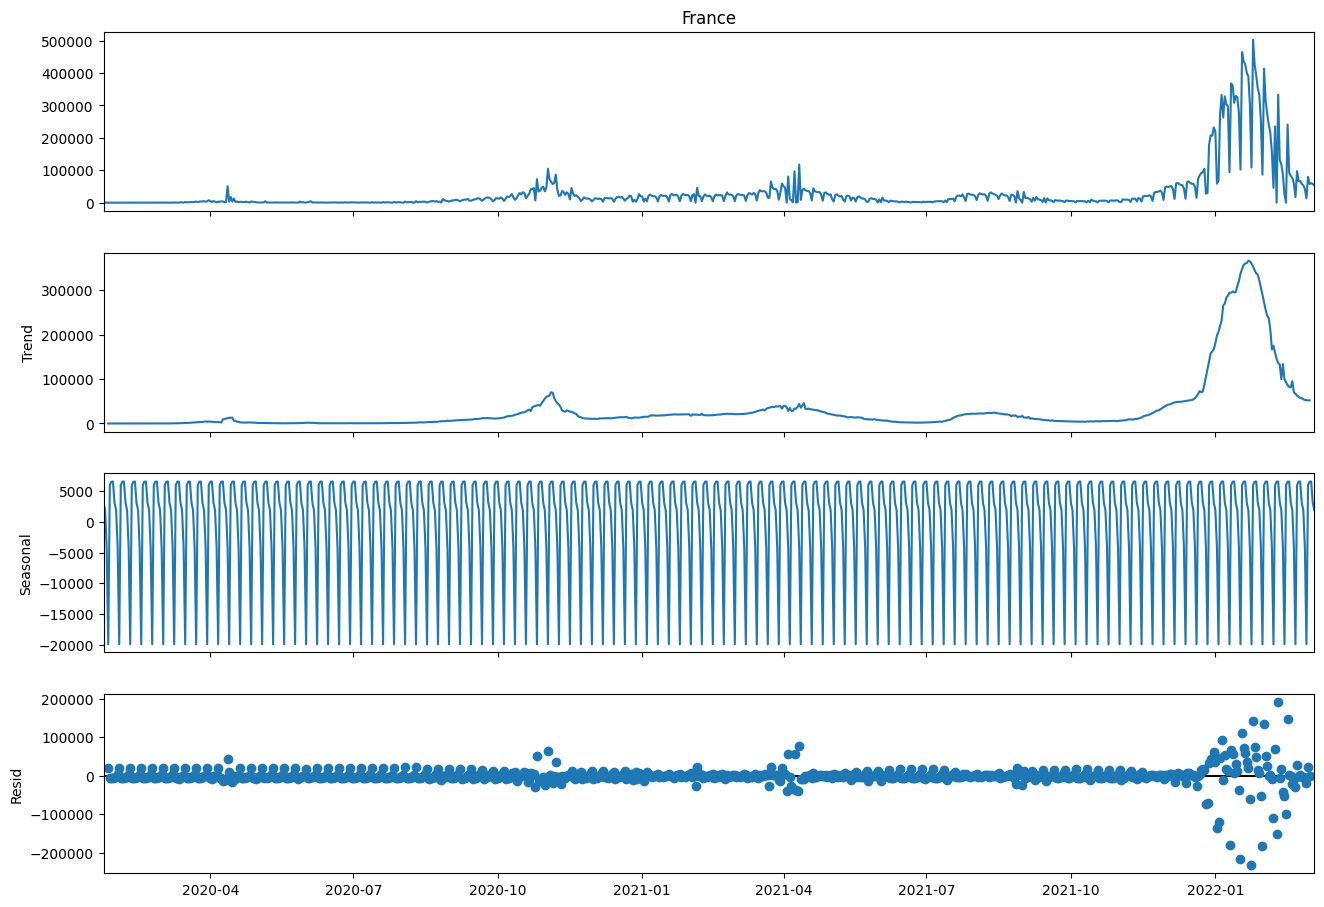

In [24]:
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

1) <b>Тренд:</b> З графіку бачимо, тенденцію повільного зростання до 2022-01, згодом відбувся стрімки стрибок та відкат до попереднього рівня
2) <b>Сезонність:</b> не спостерігається
3) <b>Залишки:</b> бачимо, що після 2022-01 залишки значно відхиляються від осі х, тобто не передбачуються тенденцією

<b>Побудую графіки автокореляції та часткової автокореляції</b>

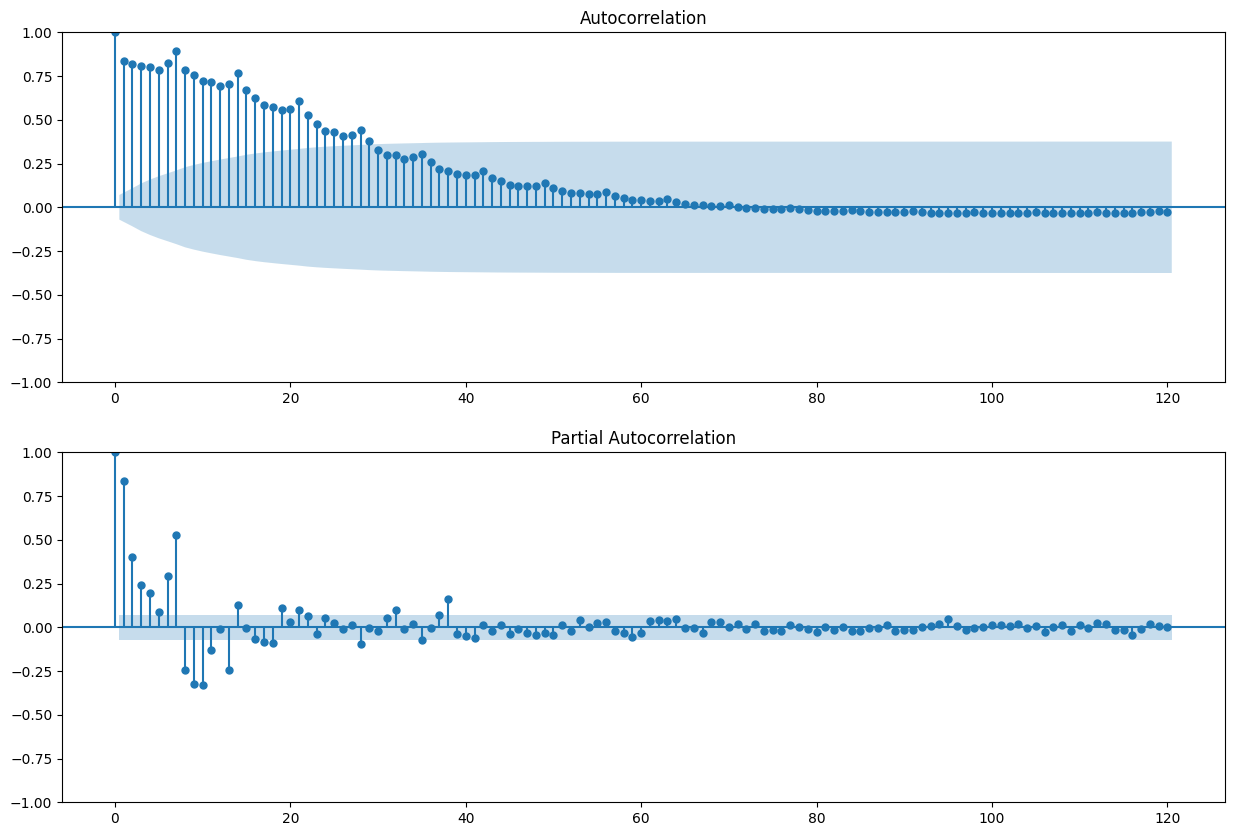

In [25]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(france_df[~france_df.isna()], ax=ax[0], lags=120)
ax[1] = plot_pacf(france_df[~france_df.isna()], ax=ax[1], lags=120)

1) Якщо значення автокореляції для конкретного лага наближається до 1, це означає, що значення на даному лагу має сильну лінійну залежність з попереднім значенням у часовому ряді. Іншими словами, значення на даному лагу сильно корелюють з попереднім значенням.
Значення, що швидко зменшуються до 0 при збільшенні лага, показують, що вплив попередніх значень на поточне значення затухає досить швидко зі зростанням затримки.

2) Швидке падіння значень PACF до нуля може свідчити про відсутність прямої залежності між значеннями часового ряду на певних лагах після врахування проміжних залежностей.

Перевіряю ряд на стаціонарність (тест Дікі-Фуллера)

In [26]:
def dickey_fuller_test(series):
    test = smt.adfuller(series, autolag='AIC')
    print('adf: ', test[0])
    print('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0] > test[4]['5%']: 
        print('Навні одиничні корені, ряд не стаціонарний.')
    else:
        print('Одиничні корені відсутні, ряд є стаціонарним.')

In [27]:
dickey_fuller_test(france_df[~france_df.isna()])

adf:  -3.090580046999571
p-value:  0.02725820687072825
Critical values:  {'1%': -3.439099096730074, '5%': -2.8654013553540745, '10%': -2.568826193777778}
Одиничні корені відсутні, ряд є стаціонарним.


Стаціонарність ряду - це властивість часового ряду, коли статистичні властивості цього ряду, такі як середнє значення, дисперсія і коваріація, залишаються стабільними в часі. Іншими словами, стаціонарний ряд не змінює свого статистичного характеру з часом.

<b>1.2. Досліджуємо часовий ряд захворювання на COVID у Великій Британії</b>

In [28]:
britain_df = neighbors_df['United Kingdom']
britain_df.head()

date
2020-01-22   NaN
2020-01-23   NaN
2020-01-24   NaN
2020-01-25   NaN
2020-01-26   NaN
Freq: D, Name: United Kingdom, dtype: float64

In [29]:
britain_df.describe()

count       765.000000
mean      24142.647712
std       32175.455002
min           0.000000
25%        2380.000000
50%       12721.000000
75%       36053.000000
max      219290.000000
Name: United Kingdom, dtype: float64

In [30]:
britain_df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 774 entries, 2020-01-22 to 2022-03-05
Freq: D
Series name: United Kingdom
Non-Null Count  Dtype  
--------------  -----  
765 non-null    float64
dtypes: float64(1)
memory usage: 12.1 KB


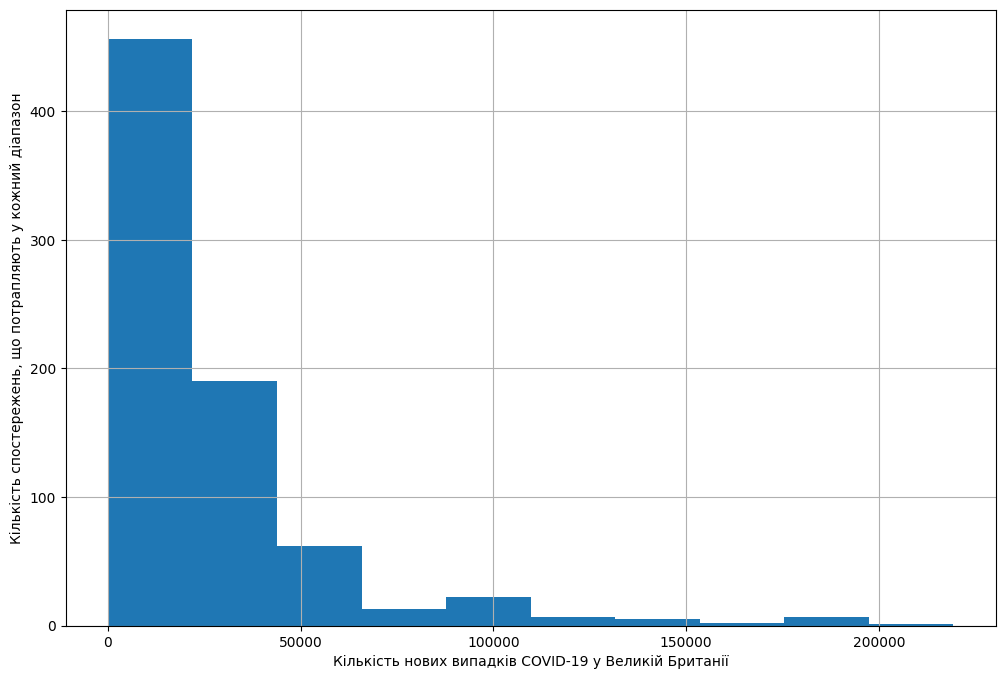

In [31]:
britain_df.hist(figsize=(12,8))

plt.xlabel('Кількість нових випадків COVID-19 у Великій Британії')
plt.ylabel('Кількість спостережень, що потрапляють у кожний діапазон')

plt.show()

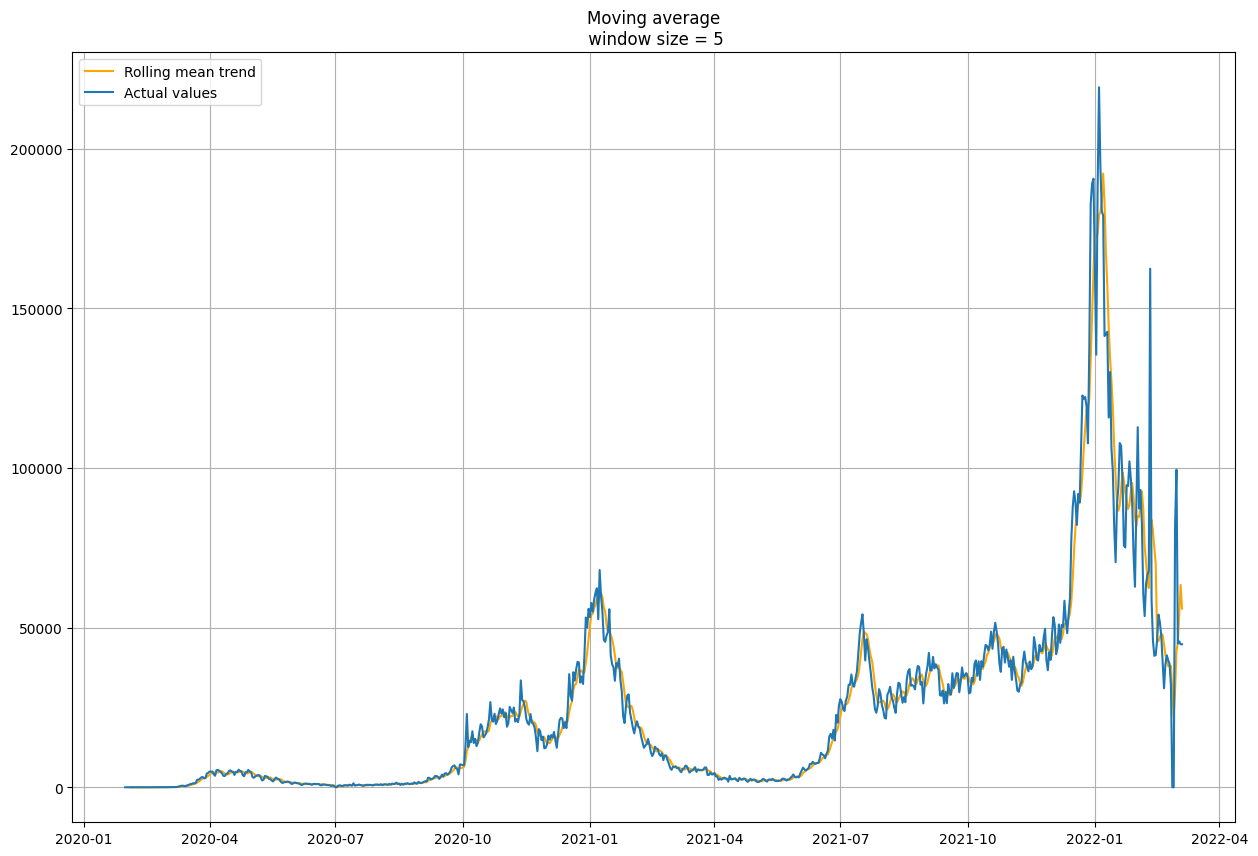

In [32]:
plot_moving_average(britain_df, 5)

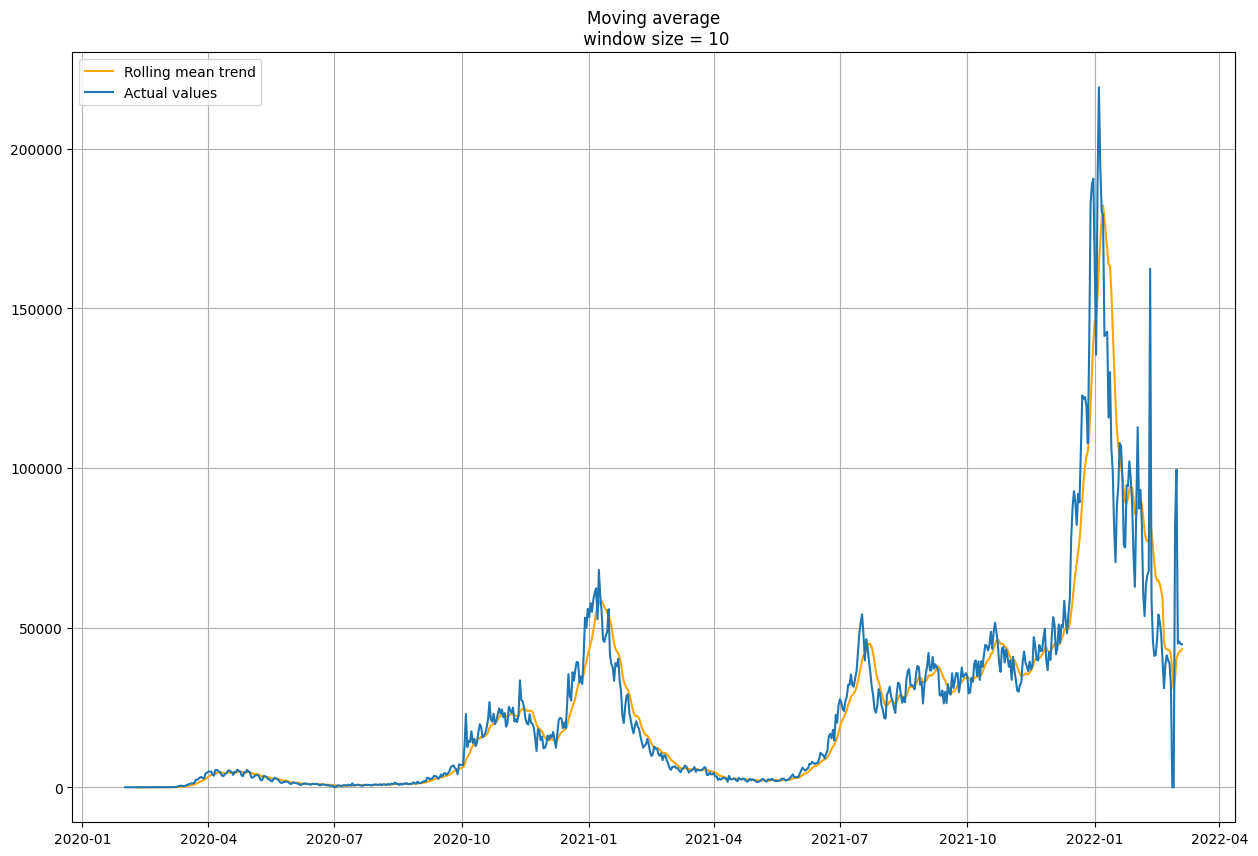

In [33]:
plot_moving_average(britain_df, 10)

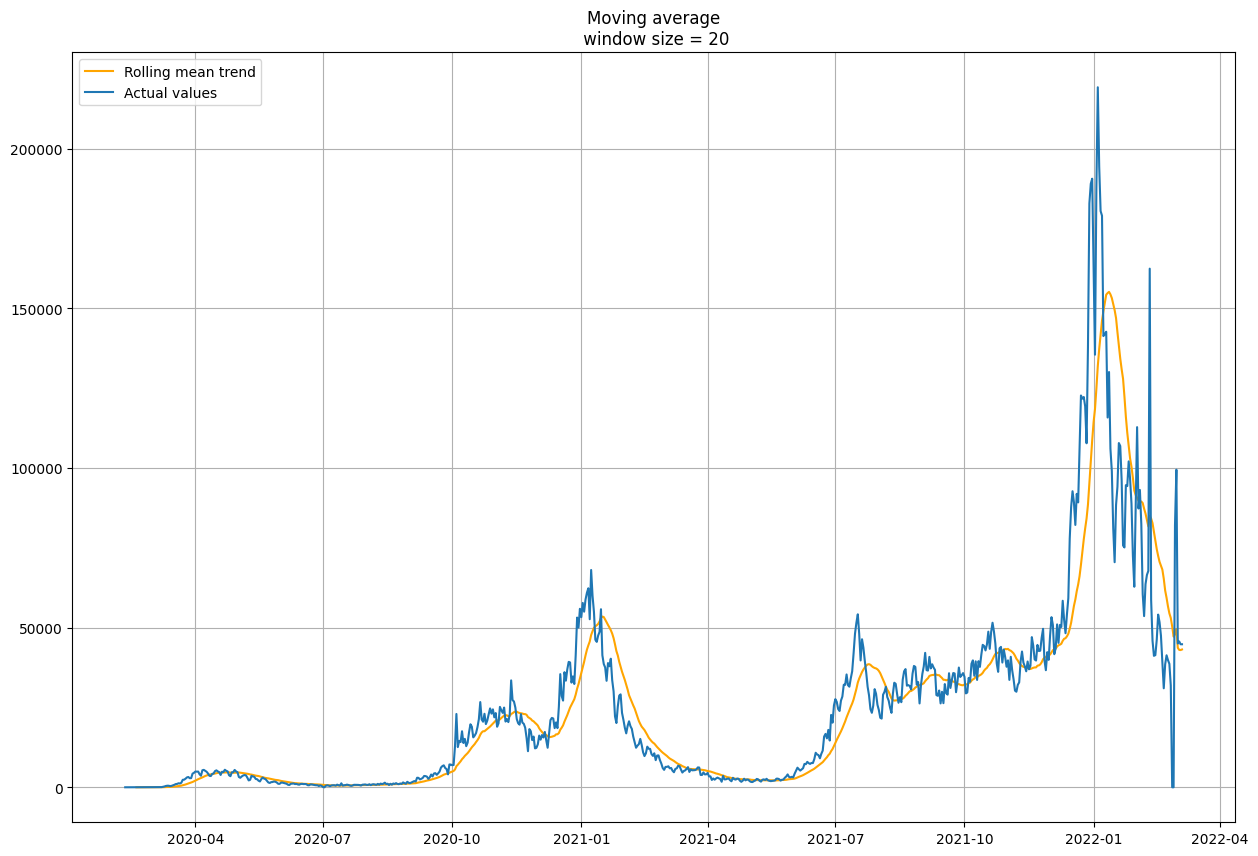

In [34]:
plot_moving_average(britain_df, 20)

<b>Візуалізуємо декомпозицію ряду на тренд, сезонність та залишки</b>

In [35]:
decomposition = smt.seasonal_decompose(britain_df[~britain_df.isna()])

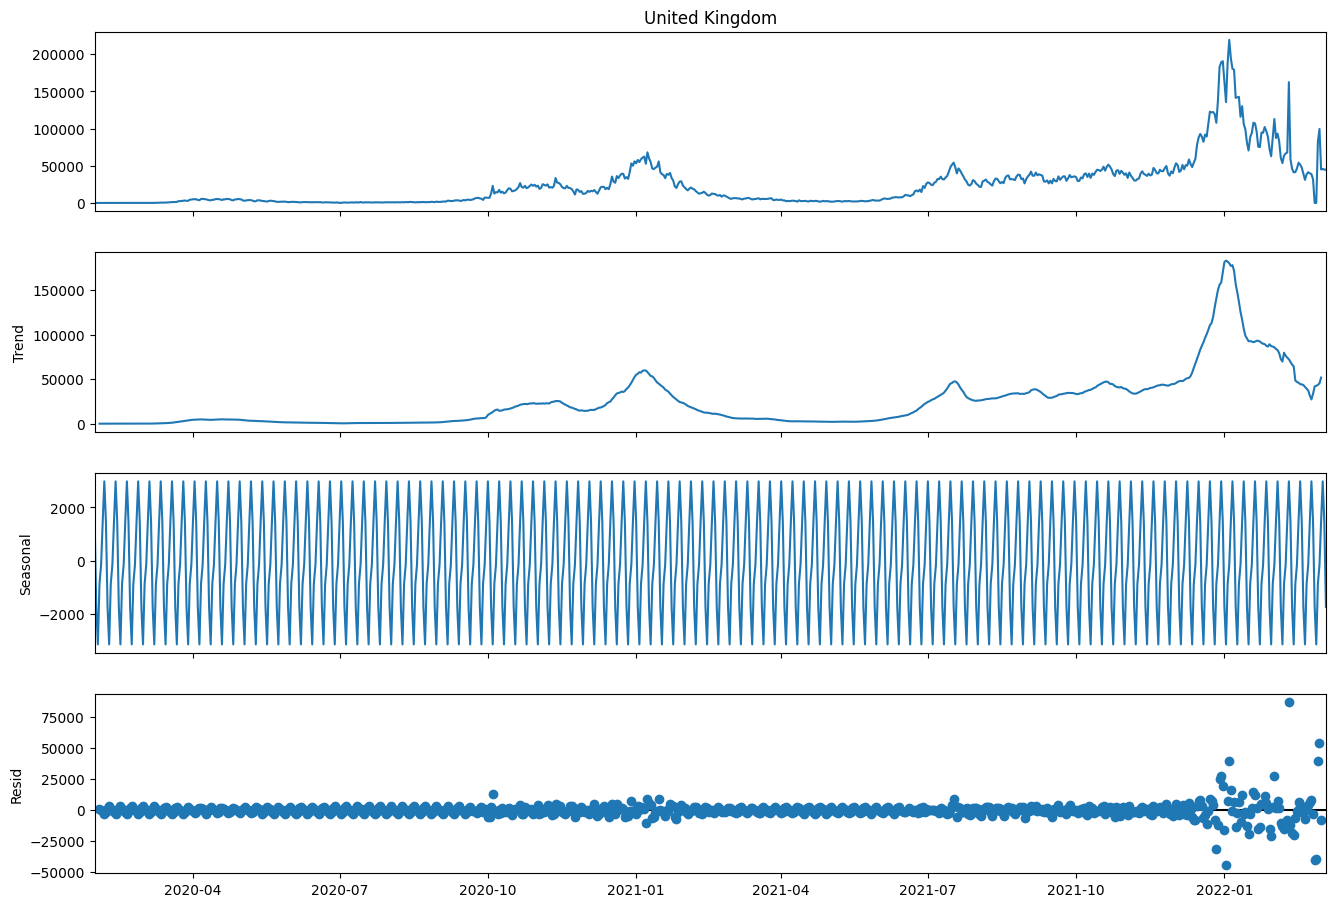

In [36]:
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

<b>Побудую графіки автокореляції та часткової автокореляції</b>

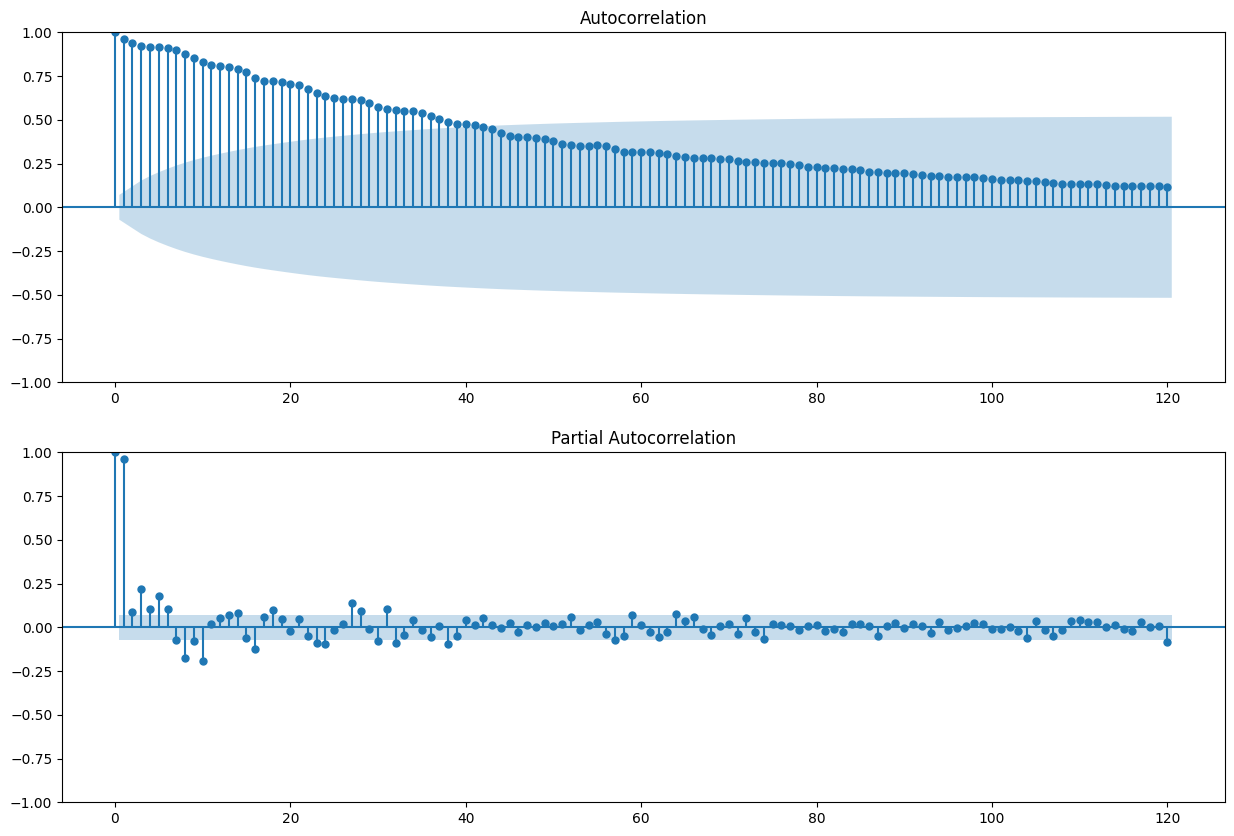

In [37]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(britain_df[~britain_df.isna()], ax=ax[0], lags=120)
ax[1] = plot_pacf(britain_df[~britain_df.isna()], ax=ax[1], lags=120)

Кореляція між значеннями часового ряду та їх лагами спадає повільніше зі збільшенням затримки у порівннянні з 1 країною

Перевіряю ряд на стаціонарність (тест Дікі-Фуллера)

In [38]:
dickey_fuller_test(britain_df[~britain_df.isna()])

adf:  -2.0631752157539176
p-value:  0.25957740926010586
Critical values:  {'1%': -3.4391580196774494, '5%': -2.8654273226340554, '10%': -2.5688400274762397}
Навні одиничні корені, ряд не стаціонарний.


Отже, на підставі результатів тесту, можна зробити висновок, що ряд не є стаціонарним, оскільки є наявність одиничних коренів. Тобто, статистичні властивості ряду змінюються з часом, що робить його менш прогнозованим та складнішим для аналізу.

<b>Будую матрицю кореляцій для кількостю випадків COVID по країнам</b>

In [39]:
cor_mat = df.corr()
cor_mat.head()

location,Afghanistan,Africa,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,...,Uzbekistan,Vanuatu,Vatican,Venezuela,Vietnam,Wallis and Futuna,World,Yemen,Zambia,Zimbabwe
location,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.000000,0.256173,-0.236005,0.204689,-0.069974,-0.052193,-0.090071,-0.050858,0.129738,-0.097539,...,0.103293,-0.042138,-0.040074,0.175246,-0.056641,-0.108779,0.002459,-0.056702,0.383430,0.123358
Africa,0.256173,1.000000,0.249582,0.555235,0.281511,0.395535,0.074974,0.177514,0.458557,-0.066164,...,0.406310,-0.082925,-0.072513,0.192296,0.104915,-0.131144,0.463658,-0.031439,0.670254,0.579110
Albania,-0.236005,0.249582,1.000000,0.261954,0.291865,0.186888,0.173030,0.429564,0.468908,0.262103,...,0.206459,-0.037726,-0.009899,0.211717,0.098689,0.003270,0.557332,0.166536,0.145886,-0.043690
Algeria,0.204689,0.555235,0.261954,1.000000,0.236176,0.093023,0.040495,0.163280,0.429095,0.208175,...,0.638358,-0.066278,-0.042934,0.265867,0.016932,-0.141091,0.496787,-0.022139,0.150483,0.194791
Andorra,-0.069974,0.281511,0.291865,0.236176,1.000000,0.253545,0.377216,0.041919,0.501223,0.064087,...,0.122481,-0.006113,0.016985,0.077448,0.122218,-0.036225,0.501328,0.012684,0.227201,0.168132


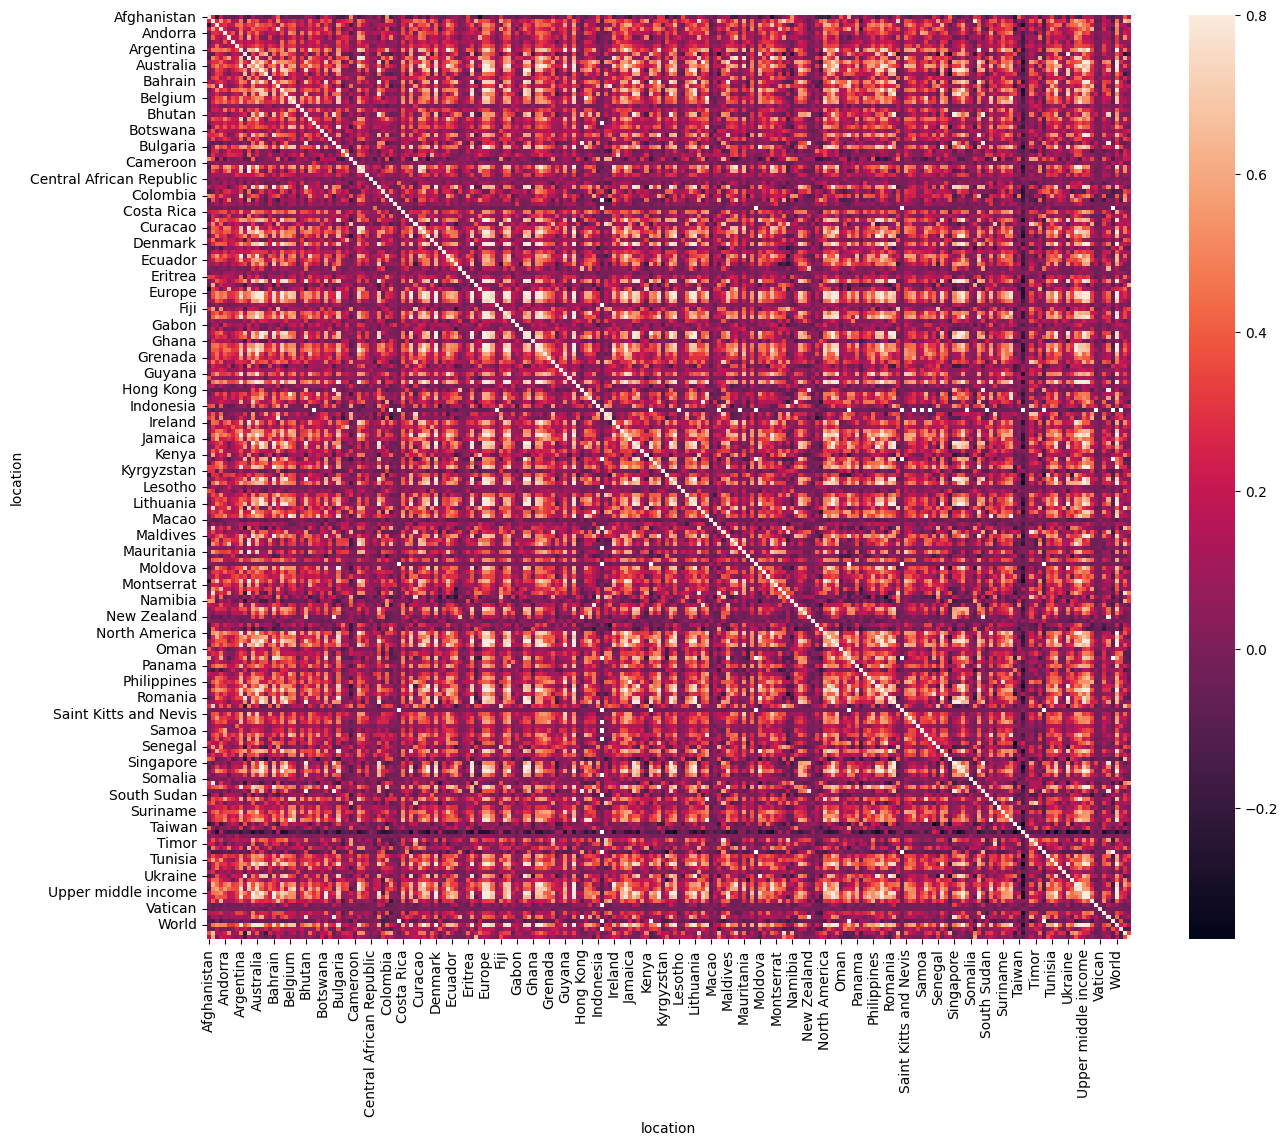

In [40]:
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(cor_mat, vmax=.8, square=True)
plt.show()

Для перевірки гіпотези про кореляцію країн, що знаходяться на різних континентах відобразимо графік з часової динамікою захворюваності для деяких навмання обраних країн з різних частин світу.

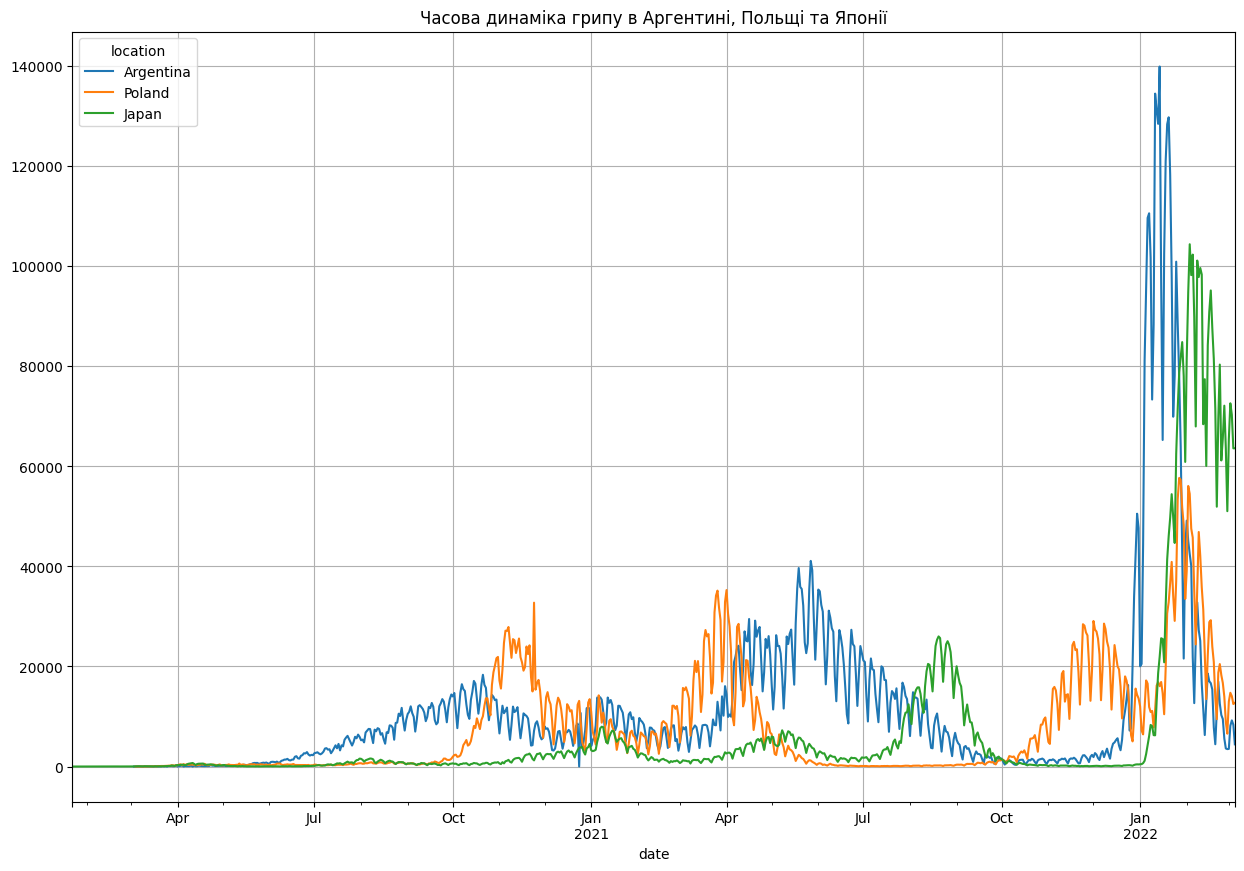

In [41]:
fig, ax = plt.subplots(figsize=(15, 10))

df[['Argentina', 'Poland', 'Japan']].plot(ax=ax)
plt.title('Часова динаміка грипу в Аргентині, Польщі та Японії')
ax.grid()
plt.show()

In [42]:
df[['Argentina', 'Poland', 'Japan']].corr()

location,Argentina,Poland,Japan
location,,,
Argentina,1.000000,0.347637,0.322709
Poland,0.347637,1.000000,0.539899
Japan,0.322709,0.539899,1.000000


Виведемо кореляційну матрицю для деяких, географічно-близько розташованих країн на різних континентах

<b>Європа</b>

In [43]:
df[['Germany', 'Poland', 'Netherlands']].corr()

location,Germany,Poland,Netherlands
location,,,
Germany,1.000000,0.656588,0.636158
Poland,0.656588,1.000000,0.570241
Netherlands,0.636158,0.570241,1.000000


<b>Південна Америка</b>

In [44]:
df[['Argentina', 'Brazil', 'Colombia']].corr()

location,Argentina,Brazil,Colombia
location,,,
Argentina,1.000000,0.559079,0.665436
Brazil,0.559079,1.000000,0.518300
Colombia,0.665436,0.518300,1.000000


<b>Азія</b>

In [45]:
df[['Japan', 'Indonesia', 'South Korea']].corr()

location,Japan,Indonesia,South Korea
location,,,
Japan,1.000000,0.595202,0.667480
Indonesia,0.595202,1.000000,0.518531
South Korea,0.667480,0.518531,1.000000


Як бачимо з результатів, країни, що знаходяться на одному континенті мають середній зв'язок, у той час як країни, що знаходяться на різних континентах, переважно помірно/слабо кореляють між собою

# 2) Побудувати та проаналізувати часовий ряд для курсу гривня/долар або гривня/євро за останні 3 роки (дані взяти в інтернеті).

На сайті Національного Банку України знайдемо дані про офіційну ціну долара у гривнях - https://bank.gov.ua/ua/markets/exchangerate-chart?cn%5B%5D=USD&startDate=13.05.2021&endDate=15.05.2024 

Зчитую дані котировок валют

In [46]:
df = pd.read_csv('uah_usd.csv')

In [47]:
df.head()

,Дата,Час,Код цифровий,Код літерний,Кількість одиниць,Назва валюти,"Офіційний курс гривні, грн"
0,08.05.2021,0.0,840,USD,1,Долар США,27.7205
1,09.05.2021,0.0,840,USD,1,Долар США,27.7205
2,10.05.2021,0.0,840,USD,1,Долар США,27.7205
3,11.05.2021,0.0,840,USD,1,Долар США,27.7641
4,12.05.2021,0.0,840,USD,1,Долар США,27.6744


Переформатую дані у зручний для роботи вигляд

In [48]:
df = df[['Дата','Офіційний курс гривні, грн']]
df.head()

,Дата,"Офіційний курс гривні, грн"
0,08.05.2021,27.7205
1,09.05.2021,27.7205
2,10.05.2021,27.7205
3,11.05.2021,27.7641
4,12.05.2021,27.6744


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097 entries, 0 to 1096
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Дата                        1097 non-null   object 
 1   Офіційний курс гривні, грн  1097 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.3+ KB


In [50]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%d.%m.%Y')
df = df.set_index('Дата')

# Заповнення пропущених значень лінійною інтерполяцією
df = df.asfreq('D').interpolate(method='linear')

<b>Дані готові до аналізу</b>

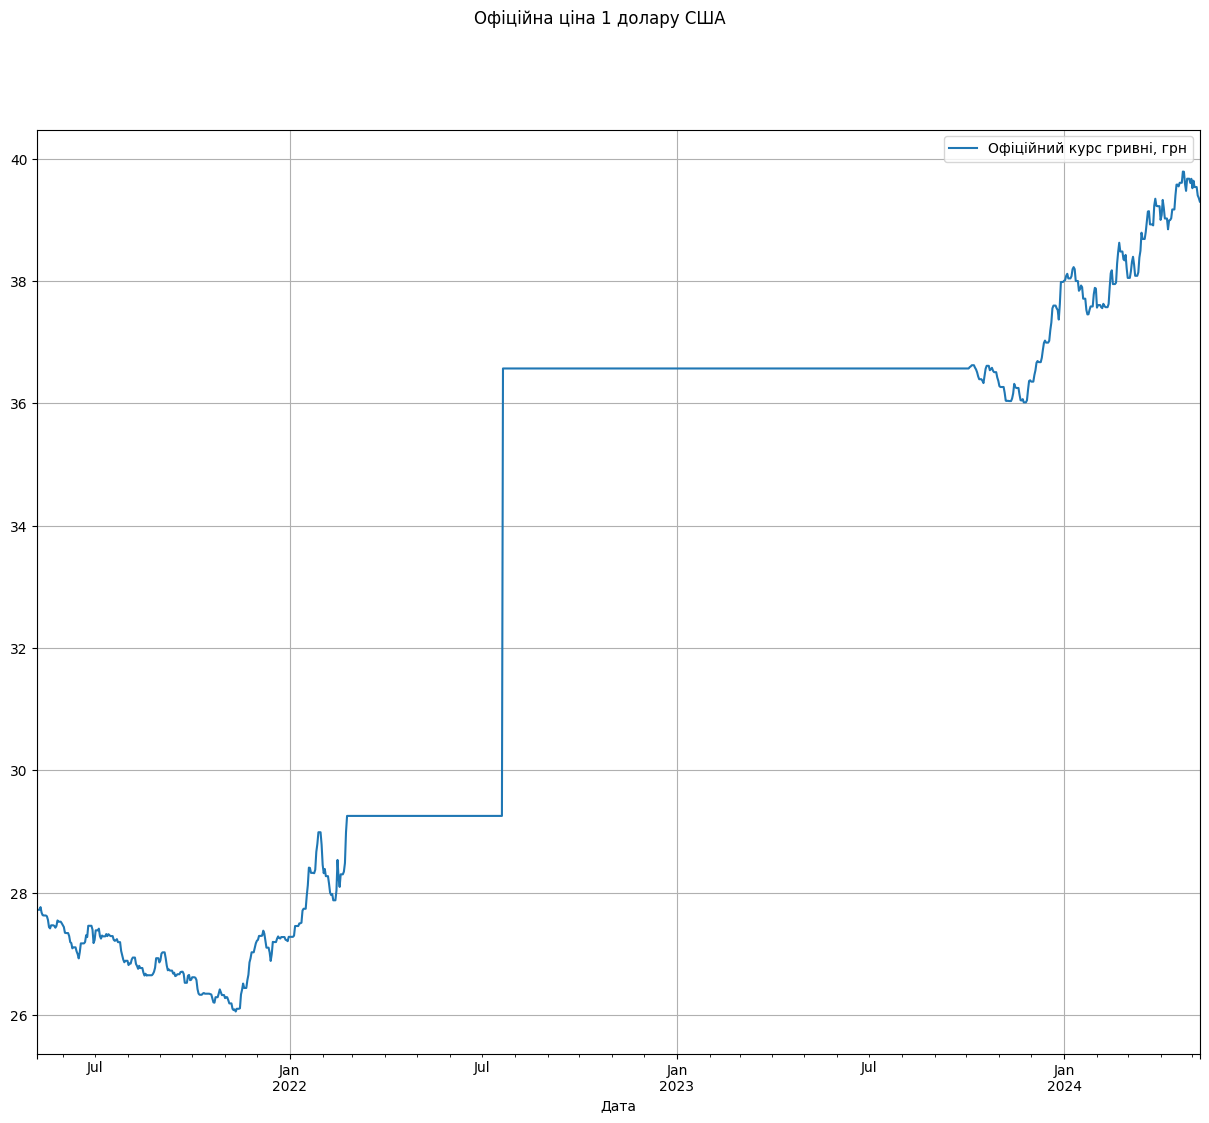

In [51]:
fig, ax = plt.subplots(figsize=(15, 12))

df.plot(ax=ax, subplots=True)
ax.grid()
plt.suptitle('Офіційна ціна 1 долару США')
plt.show()

Використовуємо згладжування для дослідження характеристик рядів

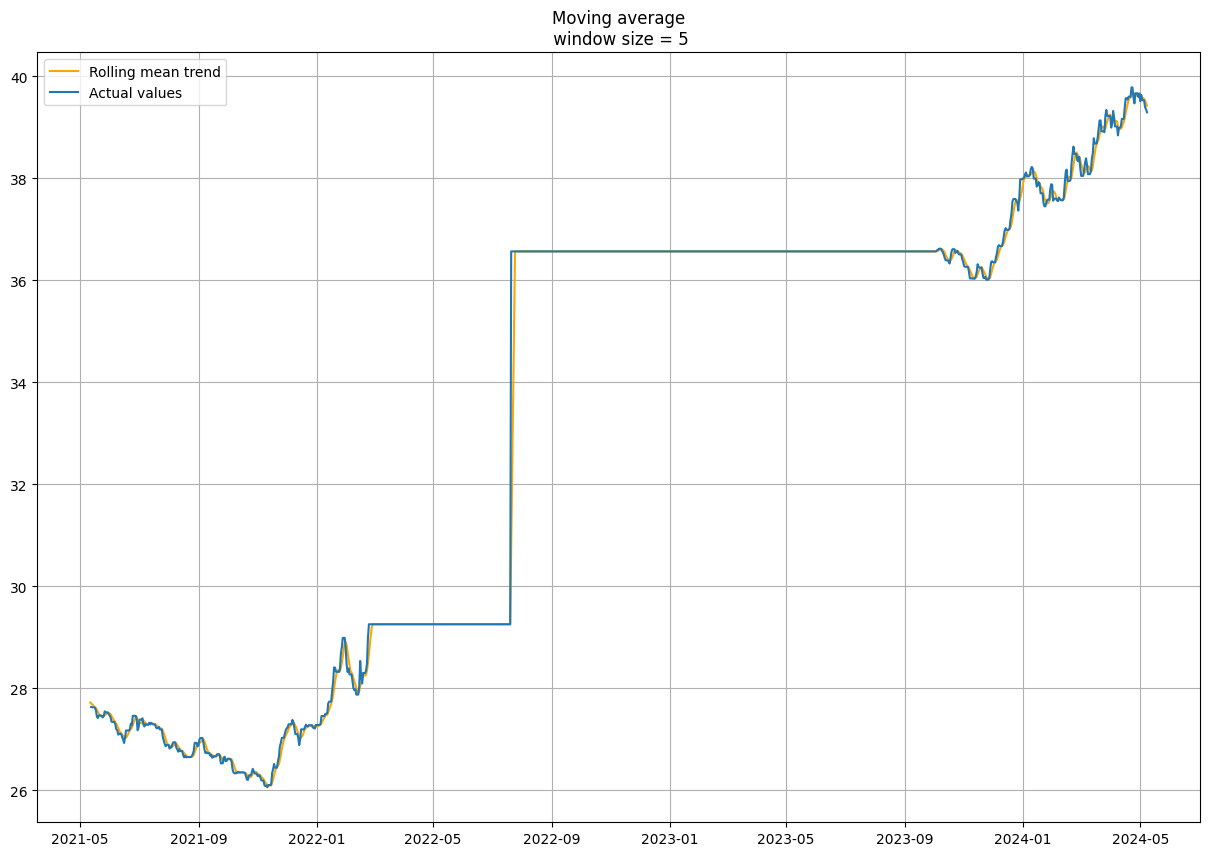

In [52]:
plot_moving_average(df, 5)

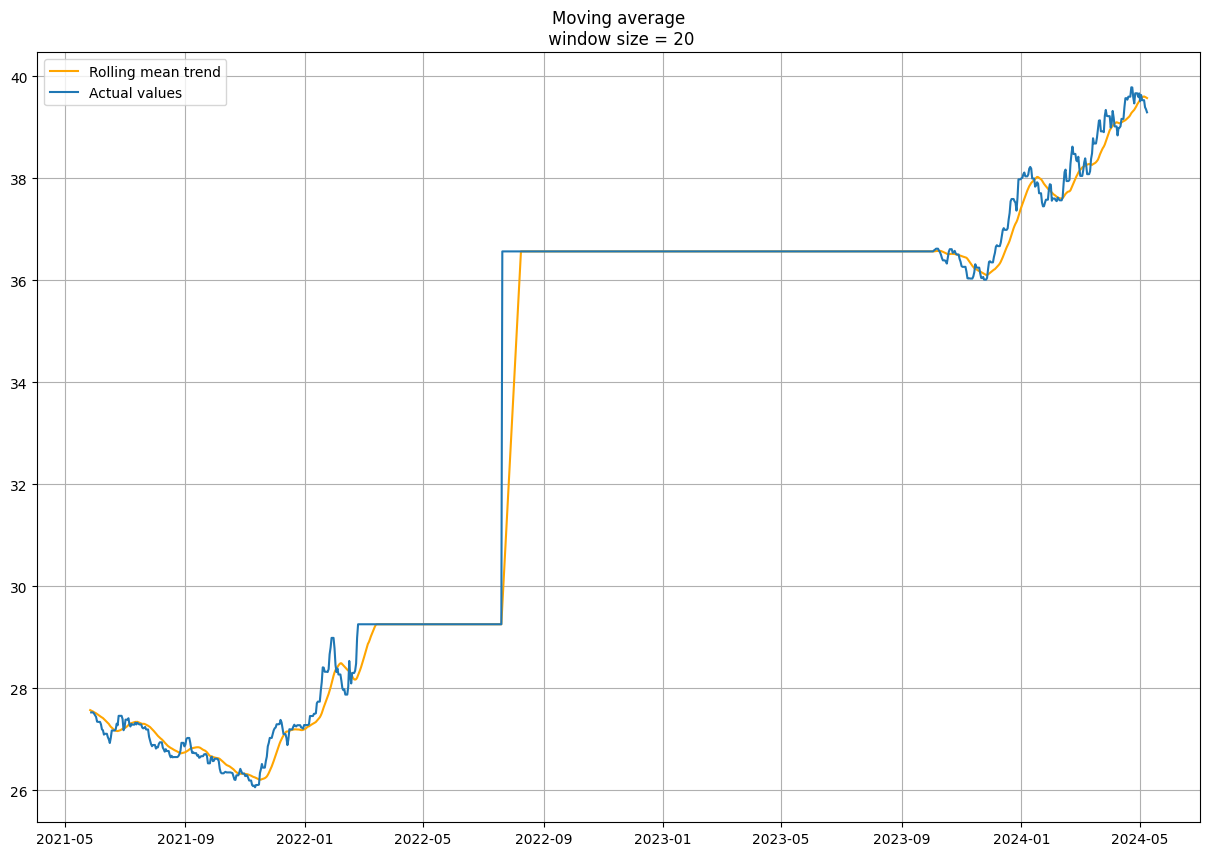

In [53]:
plot_moving_average(df, 20)

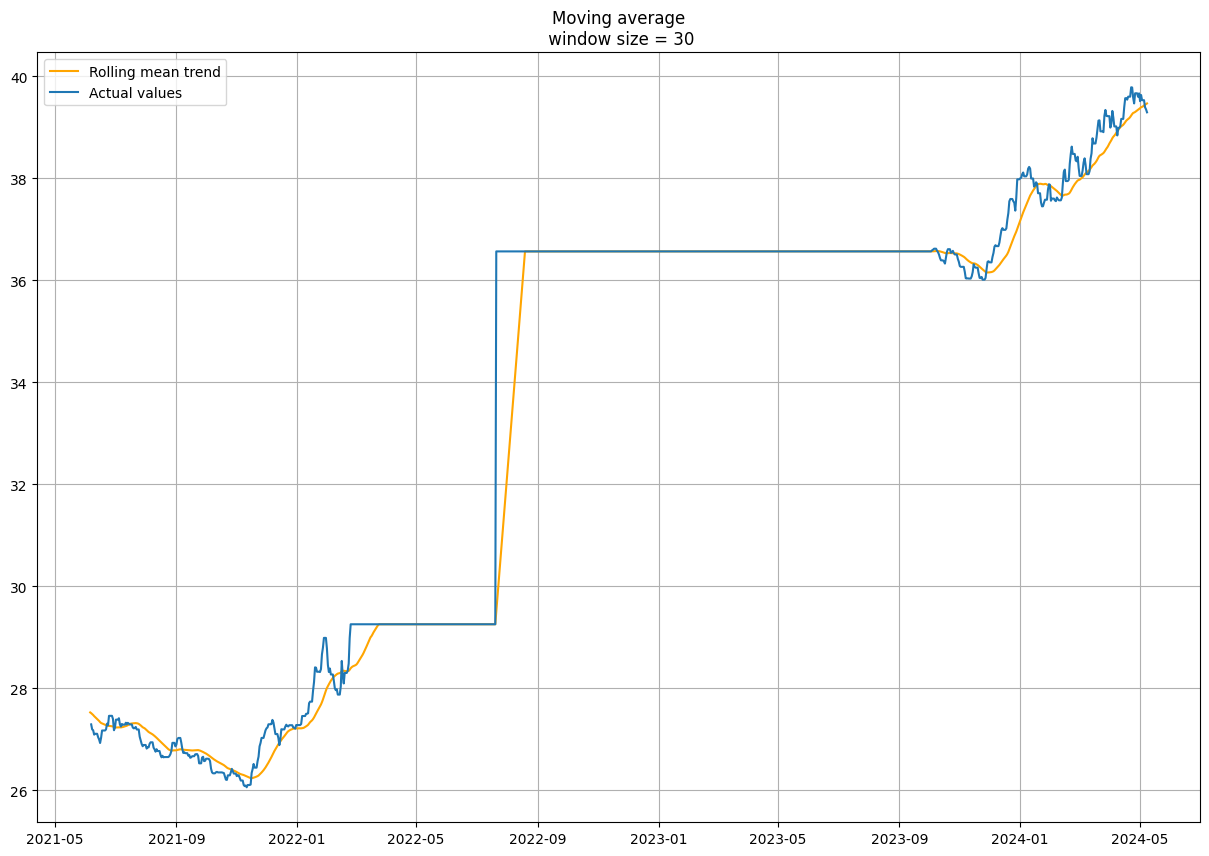

In [54]:
plot_moving_average(df, 30)

Створюю декомпозицію ціни на тренд, сезонність та залишки

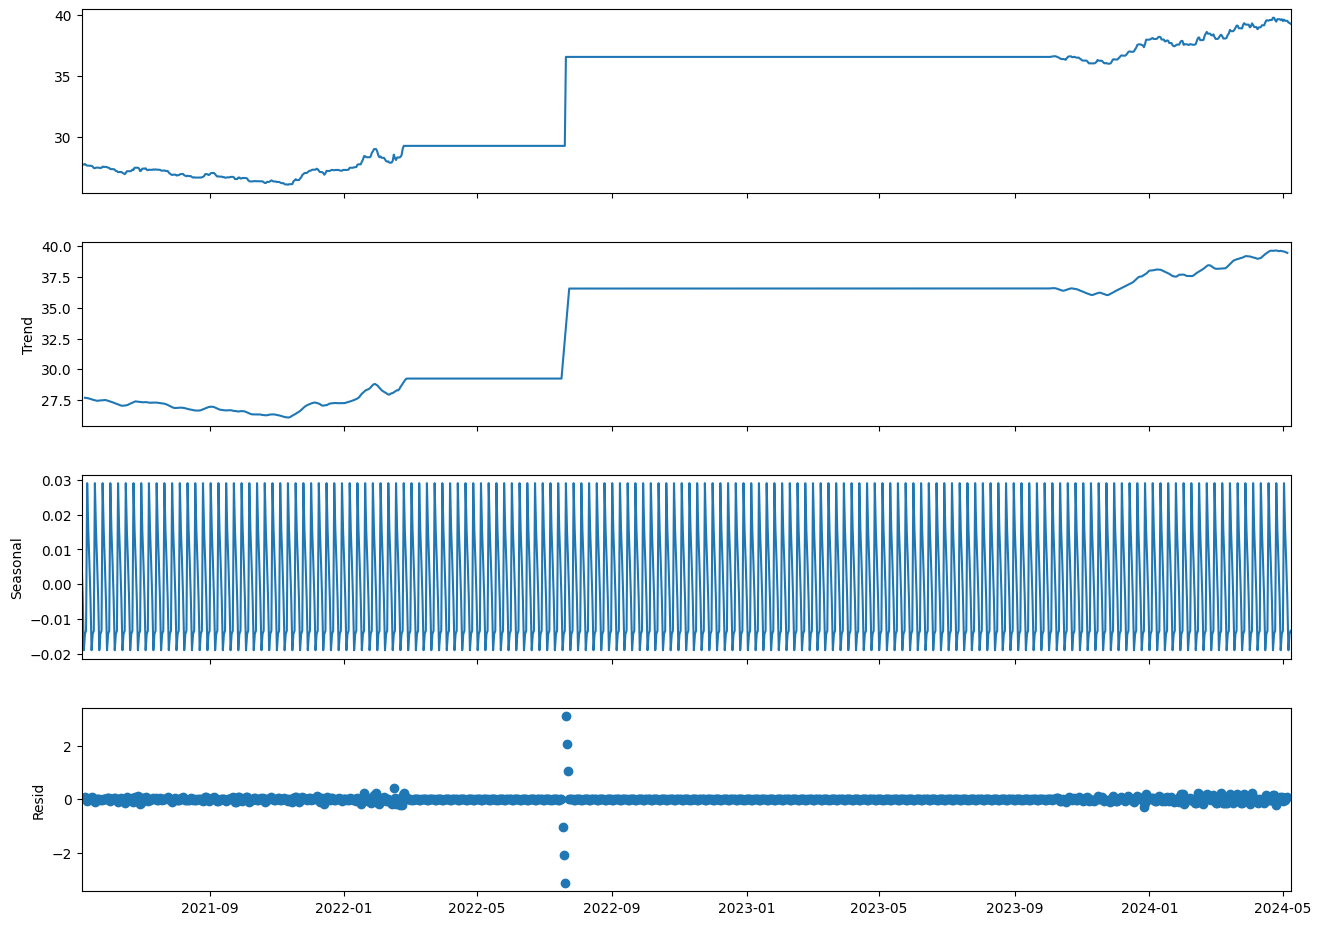

In [55]:
price_decomposition = smt.seasonal_decompose(df)
fig = price_decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

Ряд не має сезонності, спостерігається тренд до зростання.

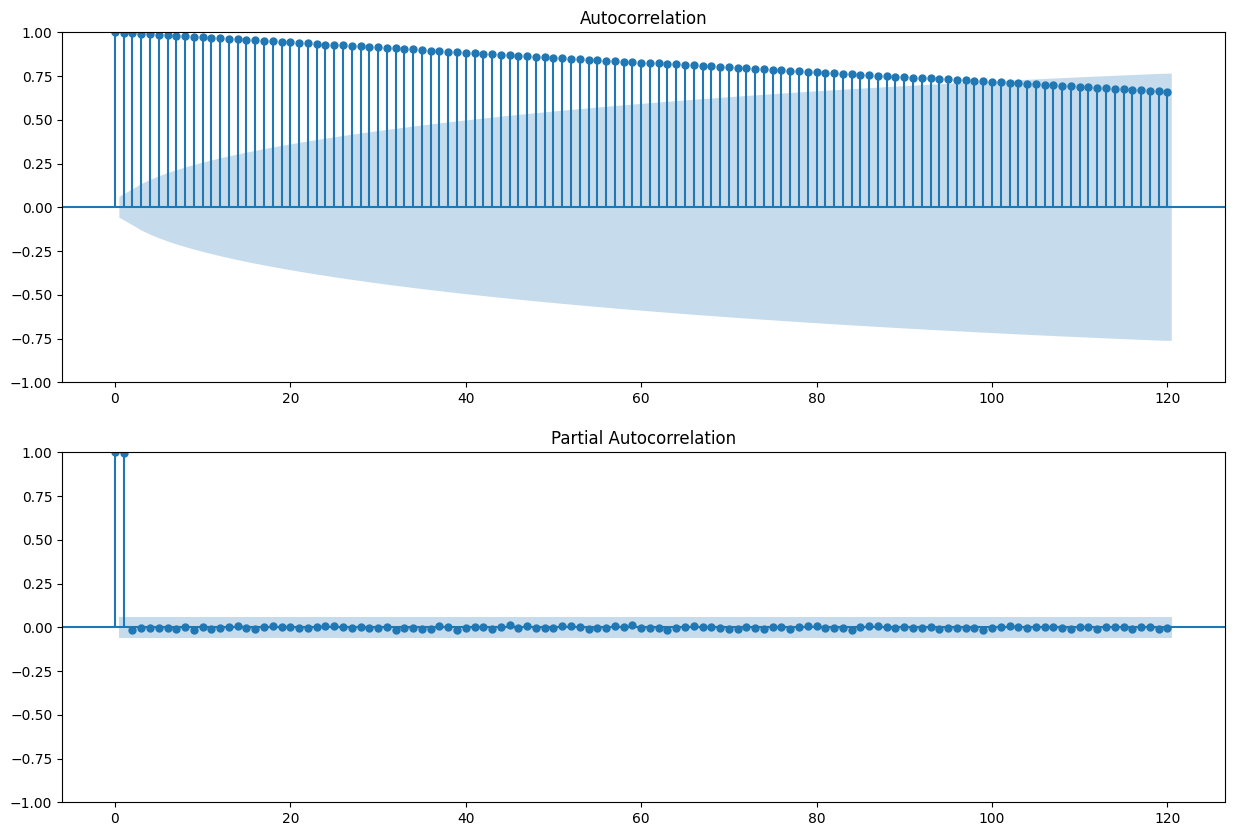

In [56]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(df, ax=ax[0], lags=120)
ax[1] = plot_pacf(df, ax=ax[1], lags=120)

Графік автокореляції показує, що перші 100 лагів є статистично значущими. Перевіримо ряд на стаціонарність:

In [57]:
dickey_fuller_test(df)

adf:  -0.7687183500107848
p-value:  0.8281385935834472
Critical values:  {'1%': -3.4363305491063763, '5%': -2.864180690211292, '10%': -2.5681759880987265}
Навні одиничні корені, ряд не стаціонарний.


Зробимо ряд стаціонарним, використавши різницю:

In [58]:
currencies_price_df_diff = df.diff(periods=1).dropna()

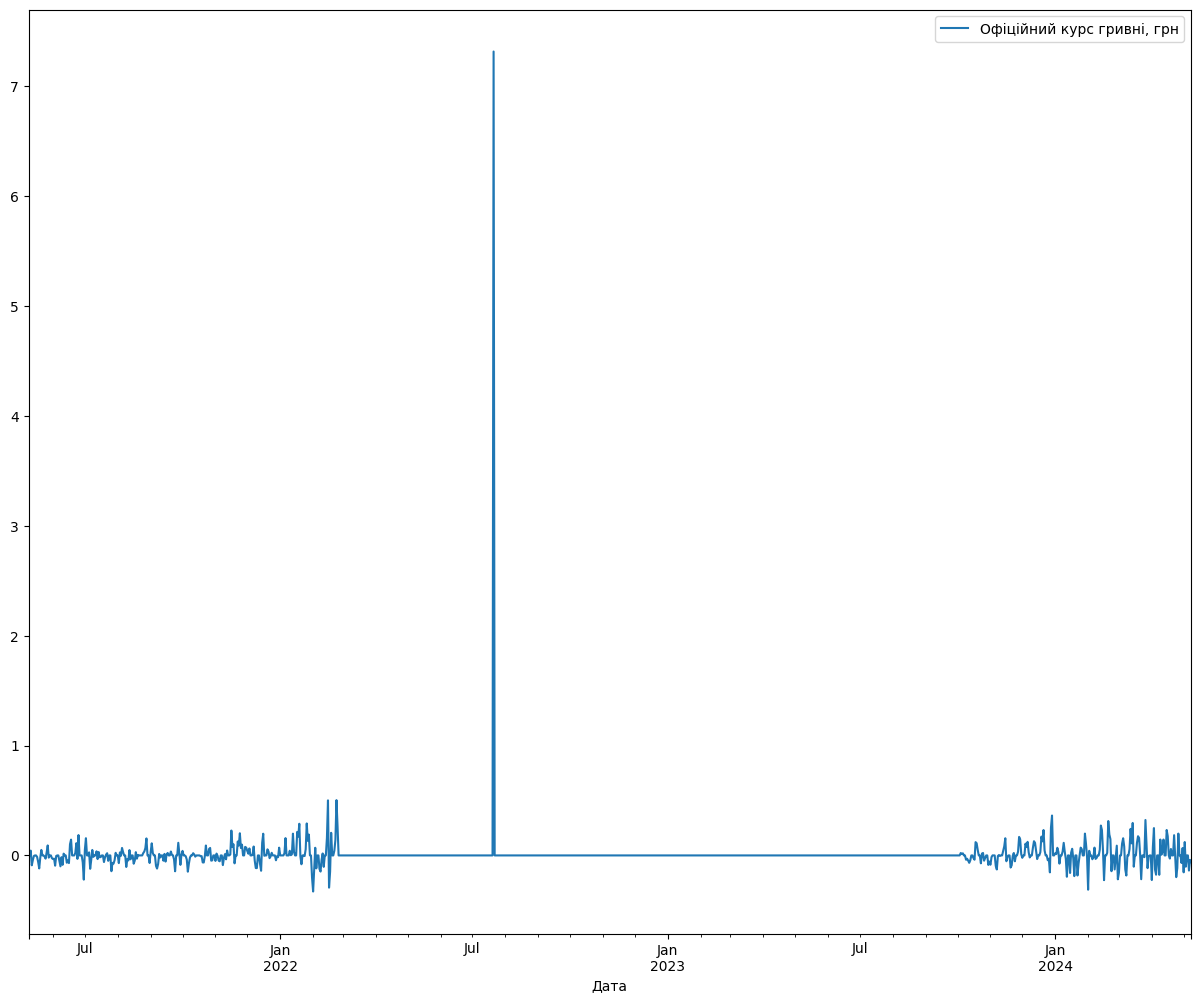

In [59]:
fig, ax = plt.subplots(figsize=(15, 12))
currencies_price_df_diff.plot(ax=ax)
plt.show()

Як бачимо з графіку, найбільша зміна курсу спостерігається у липні 2023 року

Повторно проведемо тест Дікі-Фуллера:

In [60]:
dickey_fuller_test(currencies_price_df_diff)

adf:  -32.404314099008104
p-value:  0.0
Critical values:  {'1%': -3.436336023678866, '5%': -2.8641831050780513, '10%': -2.568177274243656}
Одиничні корені відсутні, ряд є стаціонарним.


Як бачимо, різниця є стаціонарним рядом

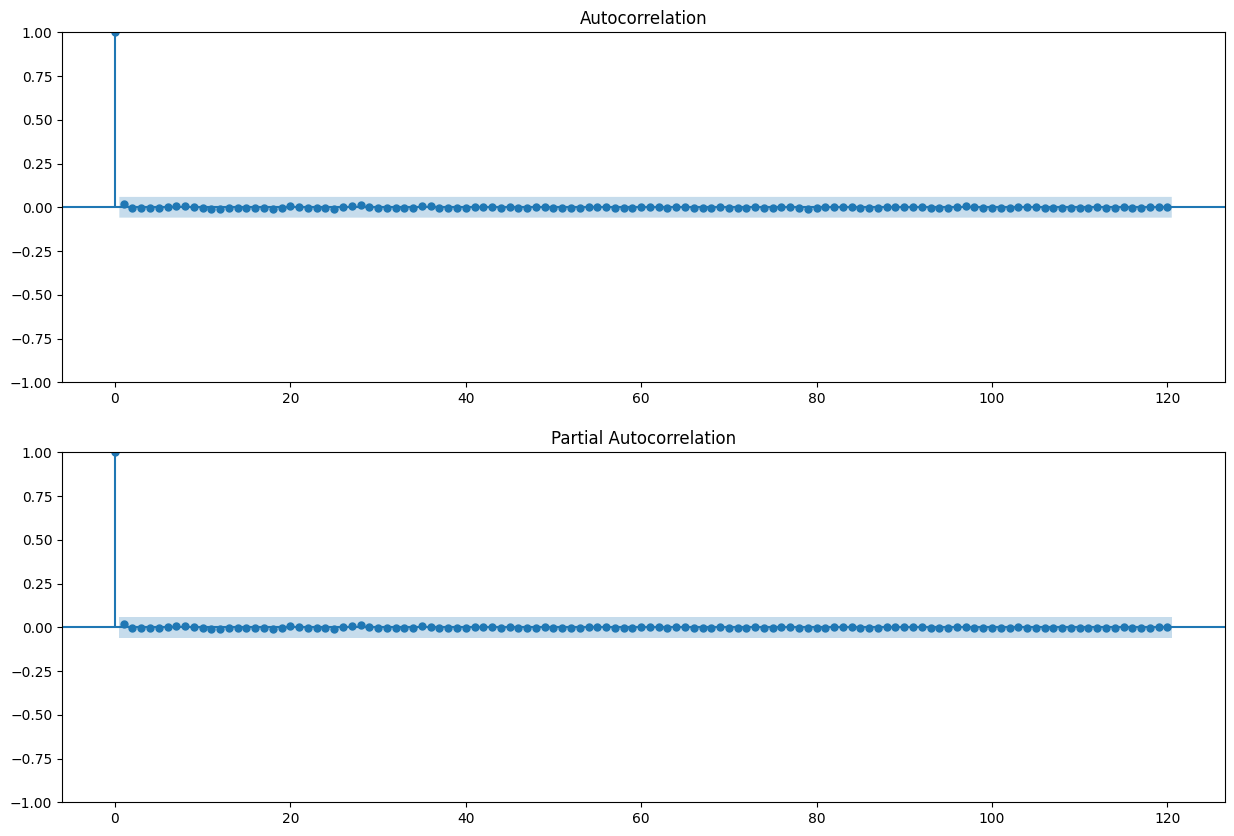

In [61]:
fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0] = plot_acf(currencies_price_df_diff, ax=ax[0], lags=120)
ax[1] = plot_pacf(currencies_price_df_diff, ax=ax[1], lags=120)

Бачимо, що графіки стали майже ідентичними

Будуємо модель ARIMA та виконуємо прогнузавання ціни на тиждень

In [62]:
train_data = df[:-7]
model = smt.ARIMA(train_data, order=(1, 1, 1)).fit()

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Офіційний курс гривні, грн   No. Observations:                 1090
Model:                         ARIMA(1, 1, 1)   Log Likelihood                  50.783
Date:                        Sun, 12 May 2024   AIC                            -95.565
Time:                                11:25:35   BIC                            -80.586
Sample:                            05-08-2021   HQIC                           -89.896
                                 - 05-01-2024                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1717      7.153     -0.024      0.981     -14.191      13.848
ma.L1          0.1943      7.153      0.027      0.978     -13.825      14.214
sigma2         0.0533      0.000    501.222      0.000       0.053       0.054
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          38495040.02
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            29.15
Prob(H) (two-sided):                  0.50   Kurtosis:                       922.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Проаналізуємо результати:
    <li> Логарифмічна ймовірність складає 50.783, а значення критерію інформативності Акаіке (AIC) дорівнює -95.565. Менше значення AIC вказує на кращу модель. </li>
    <li> Незначущі коефіцієнти: Коефіцієнти AR(1) та MA(1) не є статистично значущими, оскільки їх p-значення перевищують рівень значущості 0.05.</li>
   <li>Параметр sigma2, що відповідає за дисперсію помилок моделі, становить 0.0533.</li>
   <li>Тест Льюнга-Бокса (Ljung-Box) для перевірки автокореляції застосований до першого лагу, де отримане значення (0.01) є статистично незначущим при p-значенні 0.94. Тест Жарка-Бера (Jarque-Bera) також був застосований, але його результат вказує на серйозні відхилення від нормального розподілу</li>
   <li>Наявність гетероскедастичності та асиметрії (скос) показують значення коефіцієнтів 1.07 та 29.15 відповідно.</li>

In [64]:
pred = model.predict(df.index[-7], df.index[-1])
test_data = currencies_price_df_diff[-7:]

D:\anaconda_jup\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


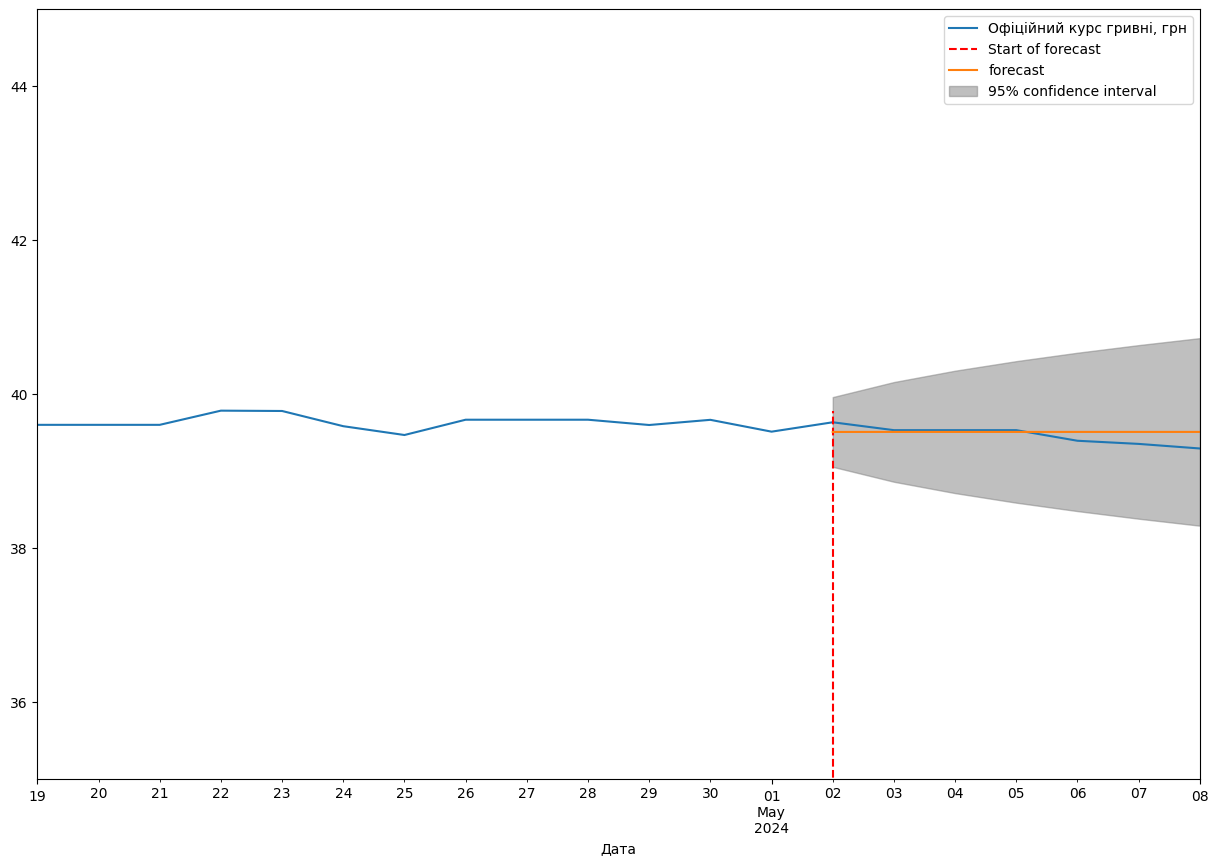

In [65]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(15, 10))
df[-20:].plot(ax=ax)
ax.vlines(df.index[-7], df.min(), df.max(), linestyle='--', color='r', label='Start of forecast')

start = df.index[-7]
end = df.index[-1]
plot_predict(model, start=start, end=end, dynamic=True, plot_insample=False, ax=ax)
ax.set_ylim(35, 45)
ax.legend()
plt.show()

Візуалізуємо прогнози та істинні значення

Для покращення результатів, можемо спробувати підібрати оптимальні параметри. Автоматично це можна зробити за допомогою функції auto_arima з бібліотеки pmdarima 

In [66]:
from pmdarima import auto_arima

best_model = auto_arima(df, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',  
                   suppress_warnings=True, 
                   stepwise=True)
best_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.93 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=663.945, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=357.157, Time=0.38 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=665.283, Time=0.10 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=228.064, Time=0.69 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.74 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.90 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=226.548, Time=0.50 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=355.853, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.51 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=228.062, Time=0.63 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=230.056, Time=0.90 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=228.546, Time=

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1097
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -110.274
Date:                            Sun, 12 May 2024   AIC                            226.548
Time:                                    11:25:57   BIC                            241.513
Sample:                                05-08-2021   HQIC                           232.213
                                     - 05-08-2024                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6658      0.003   -204.080      0.000      -0.672      -0.659
ar.S.L24      -0.3350      0.003   -102.810      0.000      -0.341      -0.329
sigma2         0.0713      0.000    381.416      0.000       0.071       0.072
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):          12964972.15
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            16.84
Prob(H) (two-sided):                  0.54   Kurtosis:                       537.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Створимо візуалізацію для прогнозу, отриманого оптимальною моделлю

D:\anaconda_jup\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['plot_insample']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


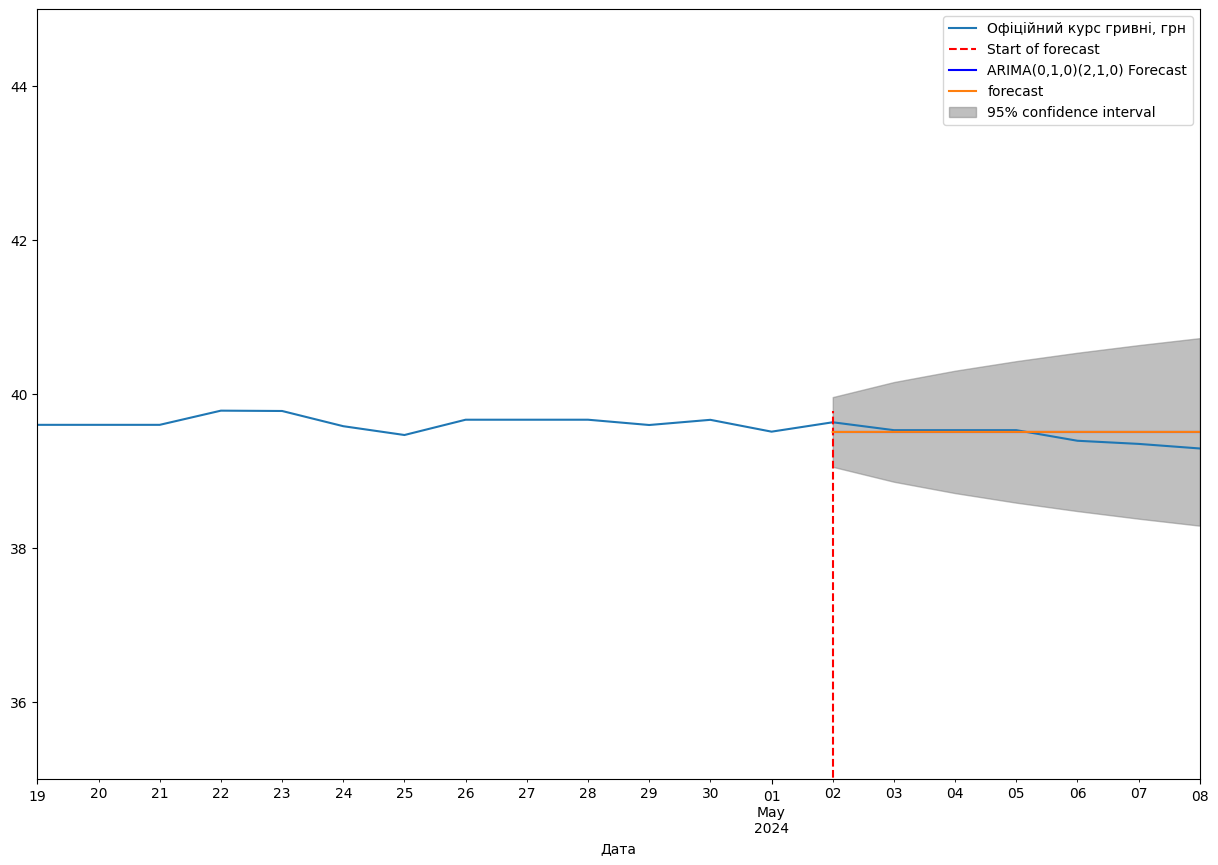

In [67]:
model_arima = smt.ARIMA(df, order=(0, 1, 0))
model_arima_fit = model_arima.fit()

forecast_arima = model_arima_fit.predict(start=start, end=end, dynamic=True)

fig, ax = plt.subplots(figsize=(15, 10))
df[-20:].plot(ax=ax)
ax.vlines(df.index[-7], df.min(), df.max(), linestyle='--', color='r', label='Start of forecast')

ax.plot(pd.date_range(start=start, end=end, freq='D'), forecast_arima, color='blue', label='ARIMA(0,1,0)(2,1,0) Forecast')
plot_predict(model, start=start, end=end, dynamic=True, plot_insample=False, ax=ax)

ax.set_ylim(35, 45)
ax.legend()
plt.show()

<b>Оцінка точності прогнозів</b>

<b>Модель 1: </b>

In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
actual_values = df[start:end]

r_squared = r2_score(actual_values, pred)
mse = mean_squared_error(actual_values, pred)


print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)

R-squared: -0.1394591446665423
Mean Squared Error (MSE): 0.014447386203946578


<b>Модель 2:</b>

In [70]:
r_squared = r2_score(actual_values, forecast_arima)
mse = mean_squared_error(actual_values, forecast_arima)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)

R-squared: -0.16031988210123105
Mean Squared Error (MSE): 0.014711882857142752


З урахуванням обох метрик можна зробити висновок, що обидві моделі не є досить ефективними у прогнозуванні даного часового ряду. Хоча точність незначно відрізняється, Модель 2 є дещо кращою.

# Додаткове завдання
Потрібно з'ясувати, чи є сезонна компонента в кількості опадів в Сіетлі (файл seattleWeather_1948-2017.csv).

<li>Градуси перевести в Цельсії.</li> 
<li>Чи є кореляція між температурою та опадами?</li> 
<li>Скласти прогноз опадів на 2018 рік, оцінити точність прогнозу</li> 

In [71]:
df = pd.read_csv('seattleWeather_1948-2017.csv')
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


<li>DATE = the date of the observation</li>
<li>PRCP = the amount of precipitation, in inches</li>
<li>TMAX = the maximum temperature for that day, in degrees Fahrenheit</li>
<li>TMIN = the minimum temperature for that day, in degrees Fahrenheit</li>
<li>RAIN = TRUE if rain was observed on that day, FALSE if it was not</li>

Переведемо градуси Фаренгейта у градуси Цельсія

In [73]:
df['TMAX'] = (df['TMAX'] - 32) * 5 / 9
df['TMIN'] = (df['TMIN'] - 32) * 5 / 9

In [74]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,10.555556,5.555556,True
1,1948-01-02,0.59,7.222222,2.222222,True
2,1948-01-03,0.42,7.222222,1.666667,True
3,1948-01-04,0.31,7.222222,1.111111,True
4,1948-01-05,0.17,7.222222,0.000000,True


Чи є кореляція між температурою та опадами?

In [75]:
df[['PRCP', 'TMAX', 'TMIN']].corr()

,PRCP,TMAX,TMIN
PRCP,1.000000,-0.226736,-0.064365
TMAX,-0.226736,1.000000,0.860684
TMIN,-0.064365,0.860684,1.000000


<li>Між опадами та максимальною температурою спостерігається слабка негативна кореляція (-0.227). Це означає, що збільшення кількості опадів супроводжується невеликим зменшенням максимальної температури, або навпаки. Однак ця кореляція досить слабка.</li>

<li>Між опадами та мінімальною температурою кореляція також є майже непомітною (-0.064).</li>

<b>Дослідимо на сезонність</b>

In [76]:
df = df[['DATE', 'PRCP']]
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

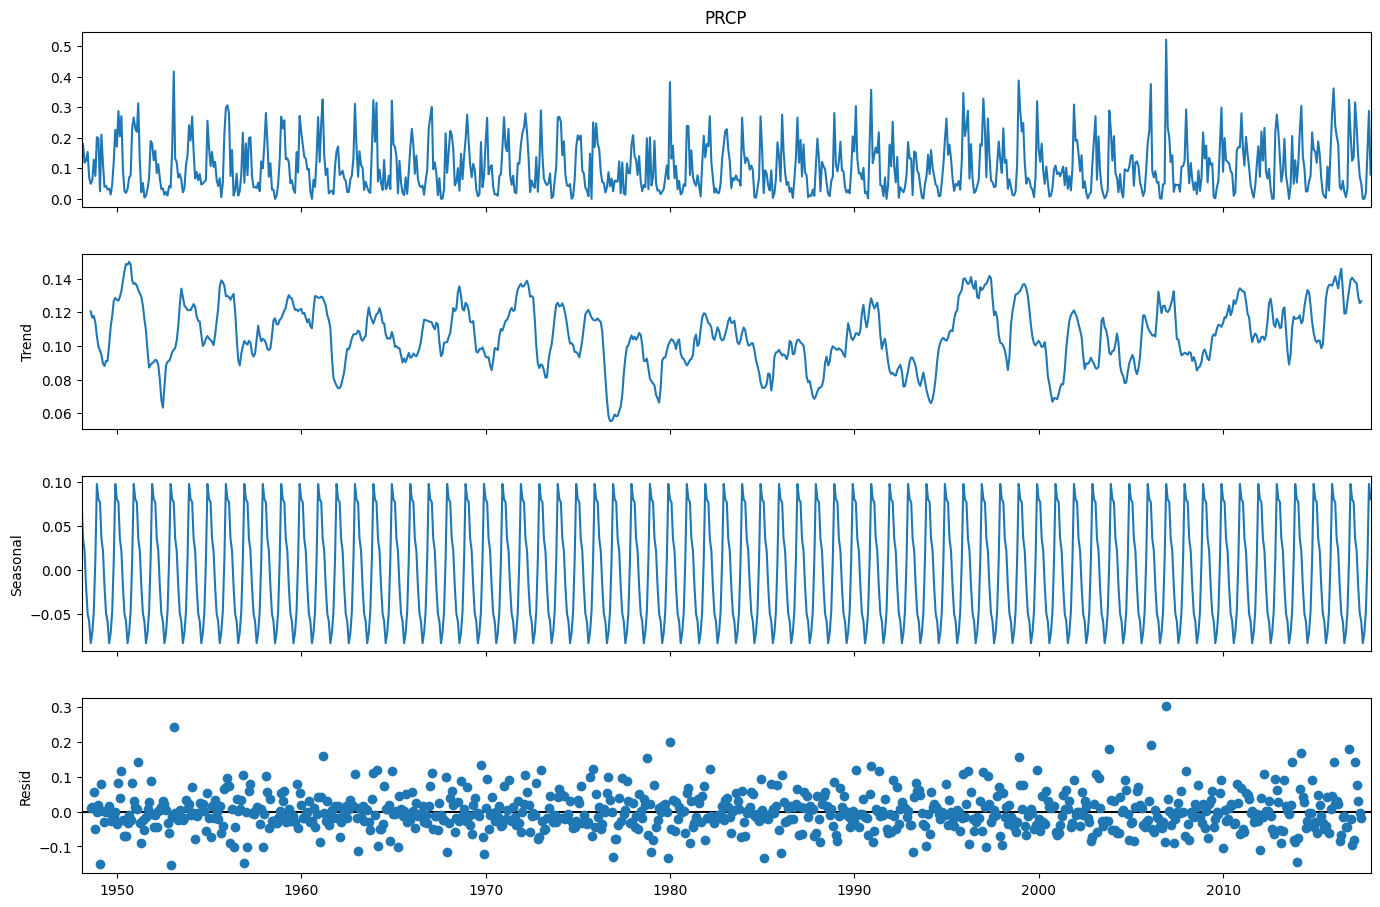

In [77]:
df_months = df['PRCP'].resample('M').mean()  # Групування за 3 місяці
decomposition = smt.seasonal_decompose(df_months)
fig = decomposition.plot()
fig.set_size_inches(15, 10)
plt.show()

Спостерігається сезонність. Набільша кількість опадів - навесні, найменша - восени

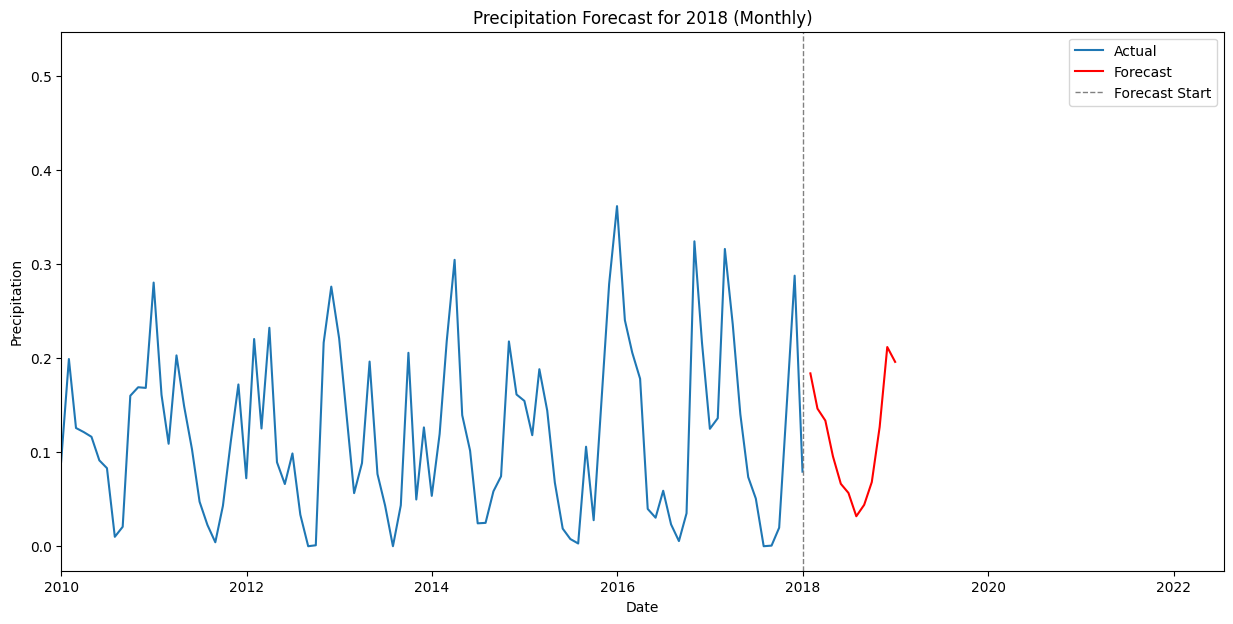

In [78]:
df_monthly = df['PRCP'].resample('M').mean()
df_monthly = pd.DataFrame(df_monthly)

model = sm.tsa.SARIMAX(df_monthly, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

forecast_2018 = model_fit.forecast(steps=12)

plt.figure(figsize=(15, 7))
plt.plot(df_monthly.index, df_monthly, label='Actual')
plt.plot(pd.date_range(start='2018-01-01', periods=12, freq='M'), forecast_2018, label='Forecast', color='red')
plt.axvline(x=pd.Timestamp('2018-01-01'), color='gray', linestyle='--', linewidth=1, label='Forecast Start')
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.title('Precipitation Forecast for 2018 (Monthly)')
plt.legend()
plt.xlim(pd.Timestamp('2010-01-01'), None)
plt.show()

Оскільки не маємо реальних даних за 2018 рік, створимо прогноз на 2017 рік та оцінимо його точність

Середня абсолютна помилка (MAE): 0.06
Корінь з середнього квадратичного відхилення (RMSE): 0.08


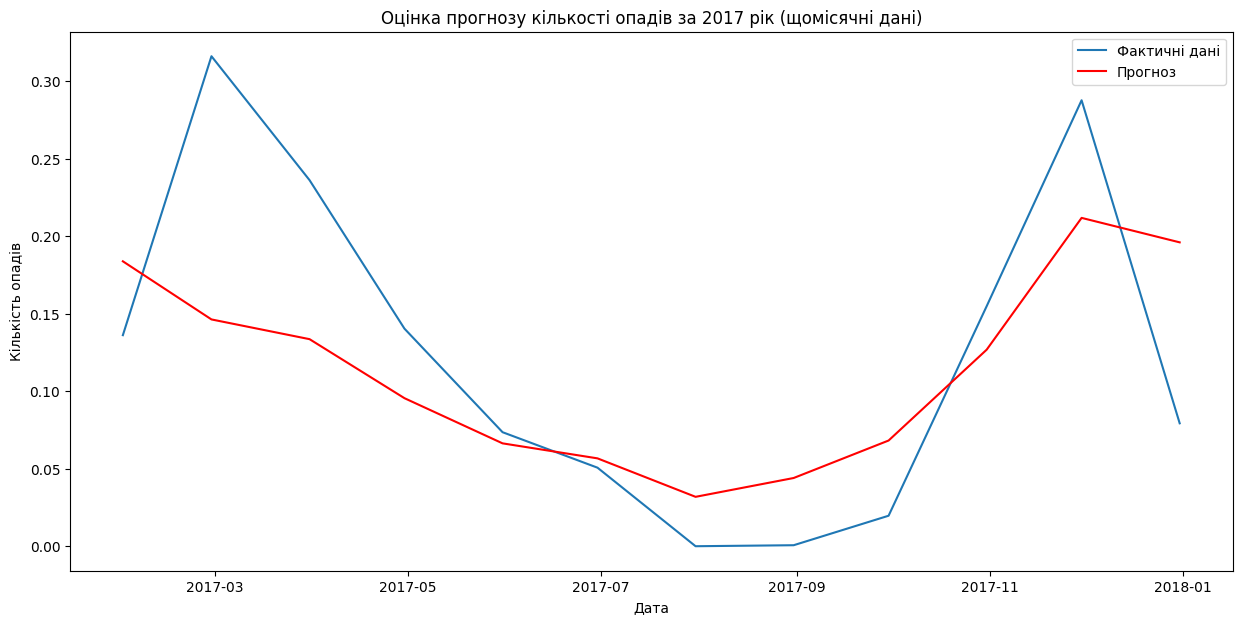

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_data = df_monthly.loc[:'2016-12-31']
test_data = df_monthly.loc['2017-01-01':]

forecast_2017 = model_fit.forecast(steps=len(test_data))

mae = mean_absolute_error(test_data, forecast_2017)
rmse = mean_squared_error(test_data, forecast_2017, squared=False)

print(f'Середня абсолютна помилка (MAE): {mae:.2f}')
print(f'Корінь з середнього квадратичного відхилення (RMSE): {rmse:.2f}')


plt.figure(figsize=(15, 7))
plt.plot(test_data.index, test_data, label='Фактичні дані')
plt.plot(test_data.index, forecast_2017, label='Прогноз', color='red')
plt.xlabel('Дата')
plt.ylabel('Кількість опадів')
plt.title('Оцінка прогнозу кількості опадів за 2017 рік (щомісячні дані)')
plt.legend()
plt.show()